# Storage equivalent plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [3]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [4]:
def plot_storage_equivalent_germany_stacked(
        storage_equivalent,
        parameter={"scenario": "Deutschland"},
        ylabel="Gespeicherte Energie [GWh]",
        figsize=(5, 3),
        loc="upper left",
        ylim=None,
        language="english",
        save_dir=None,
        title=None,
        barwidth=None,
        ax=None,
        var="energy_stored"
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Kurz", 1: "Mittel", 2: "Land"}
    else:
        type_dict = {0: "Short", 1: "Medium", 2: "Long"}
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for storage_type in range(storage_equivalent.storage_type.max()+1):
        plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
        for val in storage_equivalent[param].unique():
            tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                        (storage_equivalent.storage_type >= storage_type)&
                                        (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                            (storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type == storage_type), var
                                        ].values[0]))]
            plot_df.loc[val, ylabel] = tmp[var].sum()/1e3
        plot_df[xlabel] = storage_equivalent[param].unique()

        sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                    data=plot_df, ax=ax, label=type_dict[storage_type])
    if loc is not None:
        plt.legend(loc=loc)#loc="lower left"
    if barwidth is not None:
        change_width(ax, barwidth)
    if ylim is not None:
        # ax.get_ylim()
        ax.set_ylim(ylim)
    if param in ["nr_ev"]:
        xticklabels = ax.get_xticklabels()
        ax.set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    #plt.show()

In [5]:
def plot_storage_equivalent_germany_stacked_two(
        storage_equivalent_1, storage_equivalent_2,
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        figsize=(8, 3),
        ylim=None,
        language="english",
        loc="upper left",
        save_dir=None,
        titles = ["Reference Operation", "Optimised Operation"]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {0: {"title": titles[0], "values": storage_equivalent_1},
                1: {"title": titles[1], "values": storage_equivalent_2},}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Day", 1: "Week", 2: "Seasonal"}
    fig, axes = plt.subplots(1,2,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if ax == 0:
            axes[ax].legend(loc=loc)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim)
        if ax==1:
            axes[ax].set_ylabel("")
        elif ax==0:
            axes[ax].set_ylabel(ylabel)
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    plt.show()

In [6]:
def plot_storage_equivalent_germany_stacked_three(
        storage_equivalent_1, storage_equivalent_2, storage_equivalent_3, 
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        figsize=(8, 2.5),
        ylim=None,
        language="english",
        loc="upper left",
        save_dir=None,
        titles = ["Base Case", "With 40 Mio. EVs", "With 20 Mio. HPs"]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {0: {"title": titles[0], "values": storage_equivalent_1},
                1: {"title": titles[1], "values": storage_equivalent_2},
                2: {"title": titles[2], "values": storage_equivalent_3},}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "D", 1: "W", 2: "S"}
    fig, axes = plt.subplots(1,3,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if (ax == 0) & (loc is not None):
            axes[ax].legend(loc=loc, ncols=3)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim)
        if (ax==1) or (ax==2):
            axes[ax].set_ylabel("")
        elif ax==0:
            axes[ax].set_ylabel(ylabel)
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    plt.show()

In [7]:
def plot_storage_equivalent_germany_stacked_four(
        storage_equivalent_ref, growth, storage_equivalent_flex, diff,
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        ylabel1="Change in Stored Energy [TWh]",
        figsize=(8, 6),
        ylim=None,
        language="english",
        loc="lower left",
        save_dir=None,
        titles = ["Reference Operation", "Optimised Operation", "Growth Reference Operation", "Reduction Optimised Operation"]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {(0,0): {"title": titles[0], "values": storage_equivalent_ref, "ylim": 0},
                (0,1): {"title": titles[1], "values": storage_equivalent_flex, "ylim": 0},
                (1,0): {"title": titles[2], "values": growth, "ylim": 1},
                (1,1): {"title": titles[3], "values": diff, "ylim": 2}}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Day", 1: "Week", 2: "Seasonal"}
    fig, axes = plt.subplots(2,2,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if ax == (1,1):
            axes[ax].legend(loc=loc)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim[axes_dict[ax]["ylim"]])
        if (ax==(0,1)) or (ax==(1,1)):
            axes[ax].set_ylabel("")
        elif ax==(1,0):
            axes[ax].set_ylabel(ylabel1)
        if (ax==(0,0)) or (ax==(0,1)):
            axes[ax].set_xlabel("")
            axes[ax].set_xticklabels([])
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    plt.show()

In [8]:
def load_scenarios_and_diff(scenario_ref, scenario_flex, variation_parameter, res_dir="results/two_weeks_weight_one"):
    """
    Method to load storage equivalents of reference (inflexible) and flexible scenario and calculate 
    growth for reference scneario and difference between reference and flexible scenario.
    """
    # load reference scenario
    storage_equivalent_ref = pd.read_csv(
        f"{res_dir}/{scenario_ref}/storage_equivalents.csv",
        index_col=0).reset_index().drop(columns="index")
    # calculate growth
    growth = storage_equivalent_ref.copy()
    ref = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == 0]
    for val in getattr(storage_equivalent_ref, variation_parameter).unique():
        tmp = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == val]
        growth.loc[tmp.index, "energy_stored"] = \
            tmp["energy_stored"].values-ref["energy_stored"].values
    # load flexible scenario
    storage_equivalent_flex = pd.read_csv(
        f"{res_dir}/{scenario_flex}/storage_equivalents.csv",
        index_col=0).reset_index().drop(columns="index")
    # calculate difference between flexible and reference operation
    diff = storage_equivalent_flex.copy()
    diff["energy_stored"] = storage_equivalent_flex["energy_stored"] - \
                            storage_equivalent_ref["energy_stored"]
    return storage_equivalent_ref, growth, storage_equivalent_flex, diff

In [9]:
def get_relative_storage_composition(df, variation_parameter):
    df_percent = df.copy()
    for val in df[variation_parameter].unique():
        df_tmp = df.loc[df[variation_parameter]==val]
        energy_sum = df_tmp.energy_stored.sum()
        df_percent.loc[df_tmp.index, "energy_stored"] = df_tmp["energy_stored"].divide(energy_sum)
    return df_percent

In [10]:
save_dir = r"results\plots"

### Base Case Comparison

In [15]:
scenario = "Flat_Generation"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
scenario = "Base_Case"
storage_equivalent = pd.concat([storage_equivalent, pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)])
storage_equivalent = storage_equivalent.replace("100% RES", "100\% RES")
storage_equivalent

,storage_type,energy_stored,scenario
0,0,41195.909263,Flat Gen.
1,1,13278.173392,Flat Gen.
2,2,1624.522182,Flat Gen.
0,0,40807.899707,100\% RES
1,1,37846.959224,100\% RES
2,2,53185.359780,100\% RES


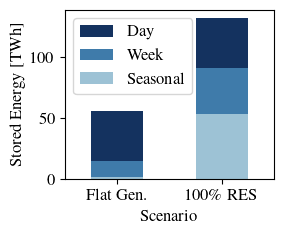

In [24]:
save_dir_tmp = os.path.join(save_dir, "storage_equivalent_base.pdf")
parameter = {"scenario": "Scenario"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper left",
            language=language,
            figsize=(3, 2.5),
            barwidth=0.5,
            save_dir=save_dir_tmp
        )

In [40]:
storage_equivalent.groupby("scenario").sum()/1000

,storage_type,energy_stored
scenario,,
100\% RES,0.003,131.840219
Flat Gen.,0.003,56.098605


In [35]:
# get relative values
demand = pd.read_csv(r"data/demand_germany_ego100.csv", index_col=0,
                     parse_dates=True)
sum_energy = demand.sum().sum()
(storage_equivalent.groupby("scenario").sum()/sum_energy)["energy_stored"]*100

scenario
100\% RES    26.336177
Flat Gen.    11.206161
Name: energy_stored, dtype: float64

In [33]:
storage_equivalent["energy_stored"]/sum_energy*100

0     8.229224
1     2.652425
2     0.324512
0     8.151716
1     7.560244
2    10.624217
Name: energy_stored, dtype: float64

In [37]:
scenario = "Flat Gen."
storage_equivalent.loc[storage_equivalent.scenario==scenario, "energy_stored"].divide(
    storage_equivalent.loc[storage_equivalent.scenario==scenario].groupby("scenario").sum().loc[scenario,"energy_stored"])

0    0.734348
1    0.236693
2    0.028958
Name: energy_stored, dtype: float64

In [38]:
scenario = "100\% RES"
storage_equivalent.loc[storage_equivalent.scenario==scenario, "energy_stored"].divide(
    storage_equivalent.loc[storage_equivalent.scenario==scenario].groupby("scenario").sum().loc[scenario,"energy_stored"])

0    0.309525
1    0.287067
2    0.403408
Name: energy_stored, dtype: float64

### Share of PV and Wind

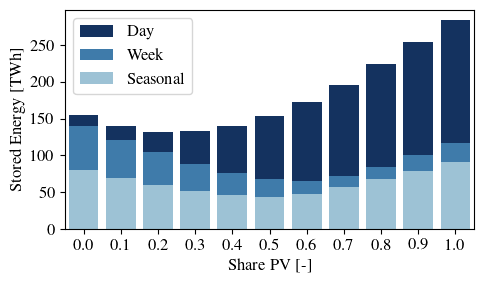

In [5]:
save_dir_tmp = os.path.join(save_dir, "storage_equivalent_share_pv.pdf")
scenario = "Variation_Generation"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper left",
            language=language,
            save_dir=save_dir_tmp
        )

In [49]:
storage_equivalent.groupby("share_pv").sum().drop(columns=["storage_type"])/1000

,energy_stored
share_pv,
0.0,155.289100
0.1,139.738574
0.2,131.488447
0.3,132.628786
0.4,140.474549
0.5,153.607179
0.6,172.243454
0.7,196.057452
0.8,224.145217


In [50]:
storage_equivalent.loc[storage_equivalent.storage_type==0].groupby("share_pv").sum().drop(columns=["storage_type"])/1000

,energy_stored
share_pv,
0.0,15.464498
0.1,18.383094
0.2,27.454087
0.3,44.312589
0.4,65.074808
0.5,86.283636
0.6,106.533036
0.7,123.476434
0.8,139.599730


In [51]:
storage_equivalent.loc[storage_equivalent.storage_type==1].groupby("share_pv").sum().drop(columns=["storage_type"])/1000

,energy_stored
share_pv,
0.0,60.319241
0.1,52.221822
0.2,44.392628
0.3,36.446161
0.4,29.595764
0.5,23.376219
0.6,18.163176
0.7,15.774464
0.8,16.974869


In [52]:
storage_equivalent.loc[storage_equivalent.storage_type==2].groupby("share_pv").sum().drop(columns=["storage_type"])/1000

,energy_stored
share_pv,
0.0,79.505361
0.1,69.133657
0.2,59.641731
0.3,51.870036
0.4,45.803976
0.5,43.947323
0.6,47.547242
0.7,56.806554
0.8,67.570618


In [47]:
storage_equivalent_relative = pd.read_csv(
        "results/{}/storage_equivalents_relative.csv".format(scenario),
        index_col=0)
storage_equivalent_relative.groupby("share_pv").sum().drop(columns=["storage_type"])

,energy_stored
share_pv,
0.0,31.020285
0.1,27.913939
0.2,26.265907
0.3,26.493700
0.4,28.060956
0.5,30.684308
0.6,34.407058
0.7,39.164102
0.8,44.774866


### Increasing Share of HPs

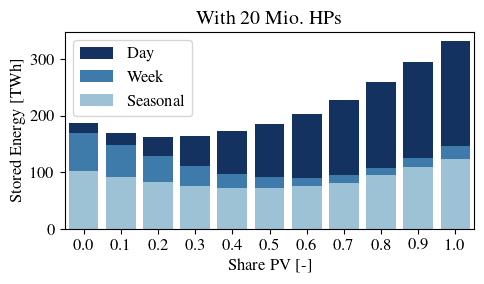

In [95]:
scenario = "Variation_Generation_HPs"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title="With 20 Mio. HPs"
        )

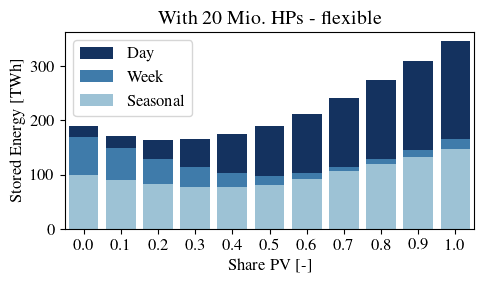

In [97]:
scenario = "Variation_Generation_HPs_flexible"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title="With 20 Mio. HPs - flexible"
        )

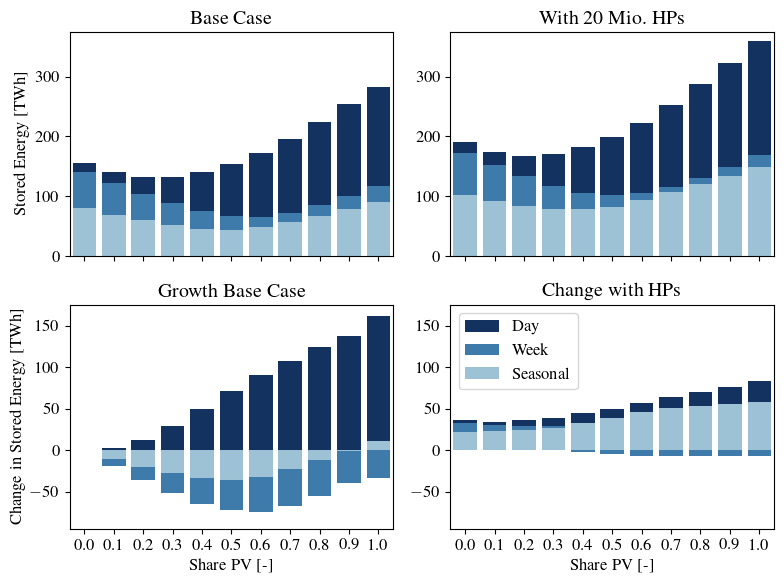

In [103]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("Variation_Generation", "Variation_Generation_HPs", "share_pv")
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 375), (-95, 175), (-95, 175)],
                                             loc="upper left",
                                             titles=["Base Case", "With 20 Mio. HPs", "Growth Base Case", "Change with HPs"])

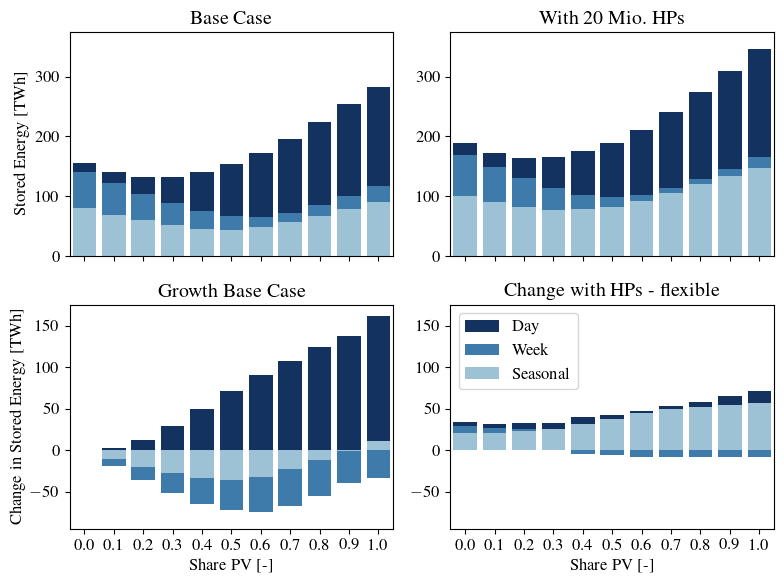

In [100]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("Variation_Generation", "Variation_Generation_HPs_flexible", "share_pv")
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 375), (-95, 175), (-95, 175)],
                                             loc="upper left",
                                             titles=["Base Case", "With 20 Mio. HPs", "Growth Base Case", "Change with HPs - flexible"])

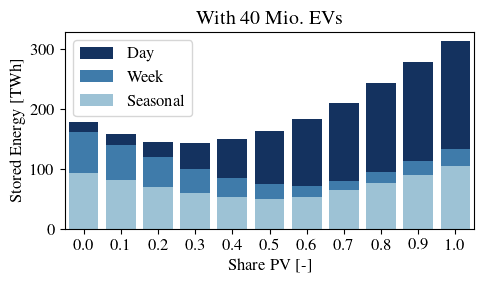

In [86]:
scenario = "Variation_Generation_EVs"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title="With 40 Mio. EVs"
        )

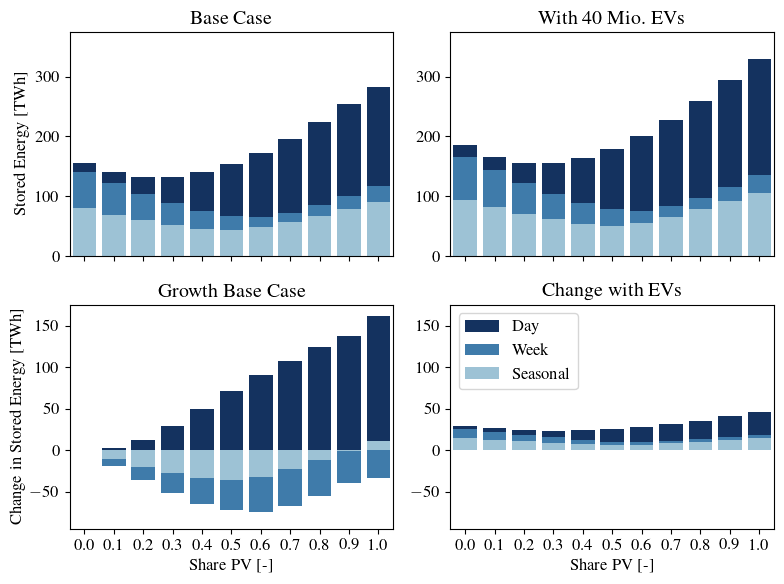

In [101]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff = load_scenarios_and_diff(
    "Variation_Generation", "Variation_Generation_EVs", "share_pv")
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 375), (-95, 175), (-95, 175)],
                                             loc="upper left",
                                             titles=["Base Case", "With 40 Mio. EVs", "Growth Base Case", "Change with EVs"])

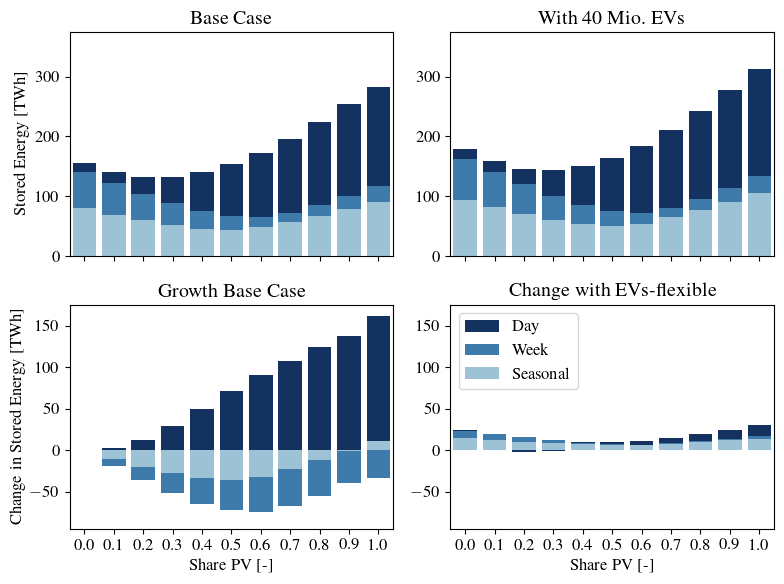

In [102]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff = load_scenarios_and_diff(
    "Variation_Generation", "Variation_Generation_EVs_flexible", "share_pv")
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 375), (-95, 175), (-95, 175)],
                                             loc="upper left",
                                             titles=["Base Case", "With 40 Mio. EVs", "Growth Base Case", "Change with EVs-flexible"])

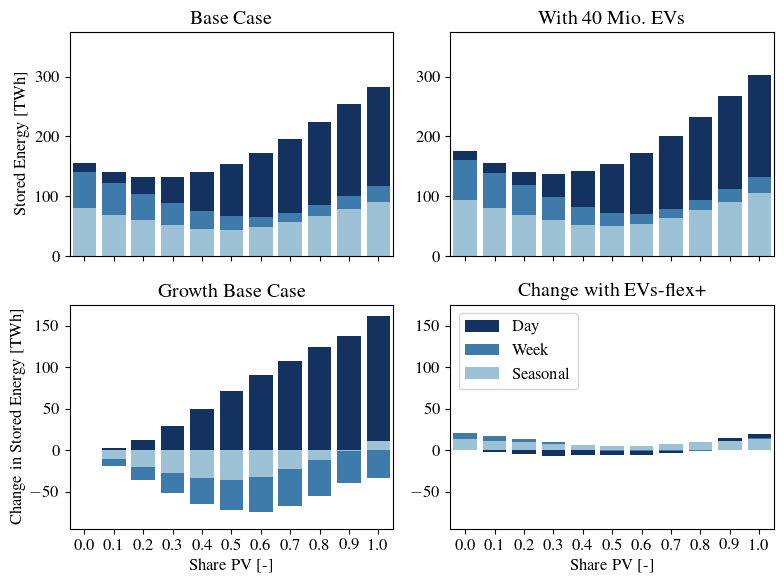

In [7]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff = load_scenarios_and_diff(
    "Variation_Generation", "Variation_Generation_EVs_flexible_with_public", "share_pv")
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 375), (-95, 175), (-95, 175)],
                                             loc="upper left",
                                             titles=["Base Case", "With 40 Mio. EVs", "Growth Base Case", "Change with EVs-flex+"])

## HP Variation

In [113]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", "HP_flexible", "nr_hp")

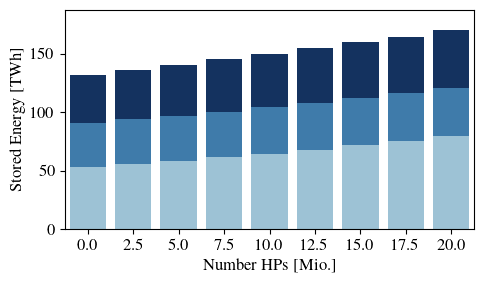

In [17]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_ref,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            ylim=(0, 187.29552),
            language=language
        )

In [116]:
sum_energy_stored = storage_equivalent_ref.groupby("nr_hp").sum().drop(columns=["storage_type","nr_ev"])/1000
sum_energy_stored

,energy_stored
nr_hp,
0.0,131.840219
2.5,136.046475
5.0,140.422464
7.5,144.967262
10.0,149.682975
12.5,154.537787
15.0,159.526769
17.5,164.617556
20.0,169.805257


In [118]:
sum_growth = growth.groupby("nr_hp").sum().drop(columns=["storage_type","nr_ev"])/1000
sum_growth

,energy_stored
nr_hp,
0.0,0.000000
2.5,4.206256
5.0,8.582245
7.5,13.127043
10.0,17.842756
12.5,22.697569
15.0,27.686550
17.5,32.777338
20.0,37.965039


In [119]:
rel_growth = sum_growth.divide(sum_energy_stored.loc[0, "energy_stored"])
rel_growth

,energy_stored
nr_hp,
0.0,0.000000
2.5,0.031904
5.0,0.065096
7.5,0.099568
10.0,0.135336
12.5,0.172160
15.0,0.210001
17.5,0.248614
20.0,0.287962


In [120]:
_, growth_flex, _, _=load_scenarios_and_diff("HP_flexible", "HP_flexible", "nr_hp")
sum_growth_flex = growth_flex.groupby("nr_hp").sum().drop(columns=["storage_type","nr_ev"])/1000
rel_growth_flex = sum_growth_flex.divide(sum_energy_stored.loc[0, "energy_stored"])
rel_growth_flex

,energy_stored
nr_hp,
0.0,0.000000
2.5,0.021040
5.0,0.045792
7.5,0.073746
10.0,0.106068
12.5,0.139852
15.0,0.175697
17.5,0.215861
20.0,0.246610


In [1]:
from scenario_input import base_scenario, scenario_input_hps, save_scenario_dict, \
    scenario_input_evs
from heat_pump_model import scale_heat_pumps

In [4]:
scenario_dict["ts_cop"]

2011-01-01 00:00:00+00:00    2.89072
2011-01-01 01:00:00+00:00    2.89956
2011-01-01 02:00:00+00:00    2.90672
2011-01-01 03:00:00+00:00    2.91556
2011-01-01 04:00:00+00:00    2.92666
                              ...   
2011-12-31 19:00:00+00:00    3.51160
2011-12-31 20:00:00+00:00    3.54166
2011-12-31 21:00:00+00:00    3.57224
2011-12-31 22:00:00+00:00    3.57082
2011-12-31 23:00:00+00:00    3.57082
Length: 8760, dtype: float64

In [2]:
scenario_dict = base_scenario()
scenario_dict = scenario_input_hps(scenario_dict=scenario_dict, mode="inflexible")
nr_hp_mio = 20
(capacity_tes, p_nom_hp, ts_heat_demand, ts_heat_el, sum_energy_heat) = scale_heat_pumps(
    nr_hp_mio, scenario_dict)

ValueError: Length mismatch: Expected 17520 rows, received array of length 8760

In [ ]:
ts_heat_el.plot(figsize=(5,3), title="Heat Demand")

In [ ]:
scenario_dict["ts_cop"].plot(figsize=(5,3), title="COP")

In [ ]:
scenario_dict["ts_cop"].mean()

In [ ]:
sum_energy_heat

In [126]:
sum_energy_heat/scenario_dict['ts_demand'].sum().sum()

0.22218821230798574

In [130]:
sum_growth["hp_energy"] = (sum_growth.index * sum_energy_heat/20000).values
(sum_growth["energy_stored"]/sum_growth["hp_energy"]).mean()

0.3229009132311952

In [131]:
sum_growth["energy_stored"]/sum_growth["hp_energy"]

nr_hp
0.0          NaN
2.5     0.302531
5.0     0.308635
7.5     0.314716
10.0    0.320831
12.5    0.326500
15.0    0.331888
17.5    0.336782
20.0    0.341325
dtype: float64

<AxesSubplot: xlabel='nr_hp'>

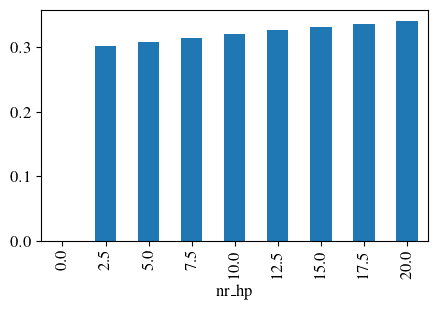

In [133]:
(sum_growth["energy_stored"]/sum_growth["hp_energy"]).plot.bar(figsize=(5,3))

In [134]:
sum_growth_flex["hp_energy"] = (sum_growth_flex.index * sum_energy_heat/20000).values
(sum_growth_flex["energy_stored"]/sum_growth_flex["hp_energy"])

nr_hp
0.0          NaN
2.5     0.199507
5.0     0.217109
7.5     0.233097
10.0    0.251447
12.5    0.265229
15.0    0.277674
17.5    0.292413
20.0    0.292310
dtype: float64

<AxesSubplot: xlabel='nr_hp'>

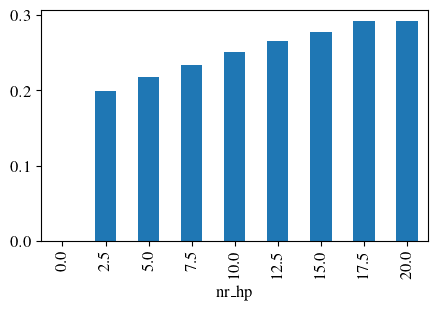

In [135]:
(sum_growth_flex["energy_stored"]/sum_growth["hp_energy"]).plot.bar(figsize=(5,3))

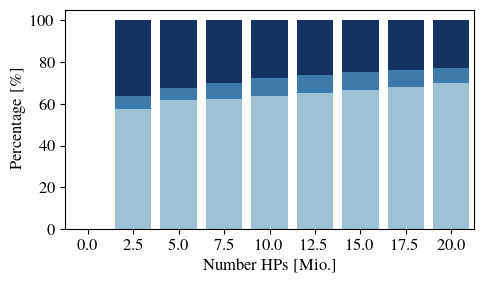

In [136]:
variation_parameter = "nr_hp"
df = growth
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

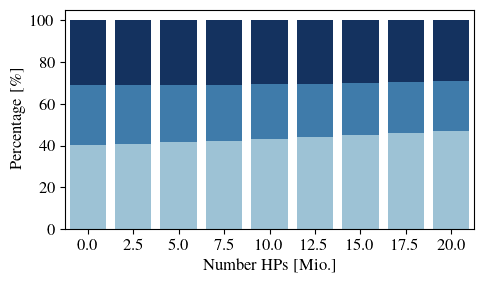

In [137]:
variation_parameter = "nr_hp"
df = storage_equivalent_ref
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

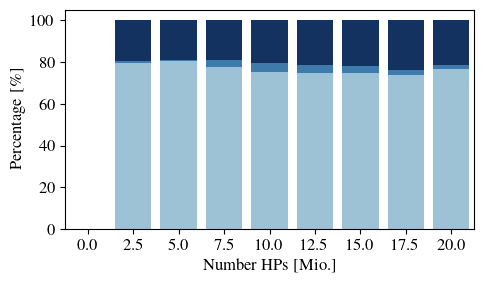

In [138]:
variation_parameter = "nr_hp"
df = growth_flex
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

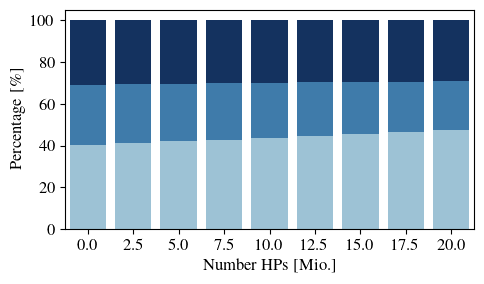

In [139]:
variation_parameter = "nr_hp"
df = storage_equivalent_flex
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

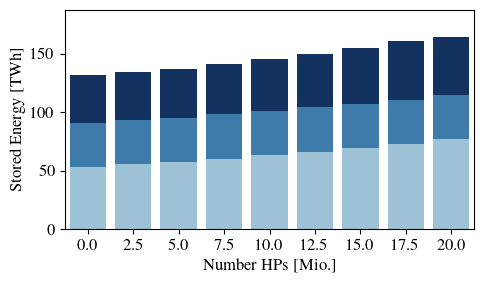

In [18]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_flex,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            ylim=(0, 187.29552),
            language=language
        )

In [55]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", "HP_flexible", "nr_hp")

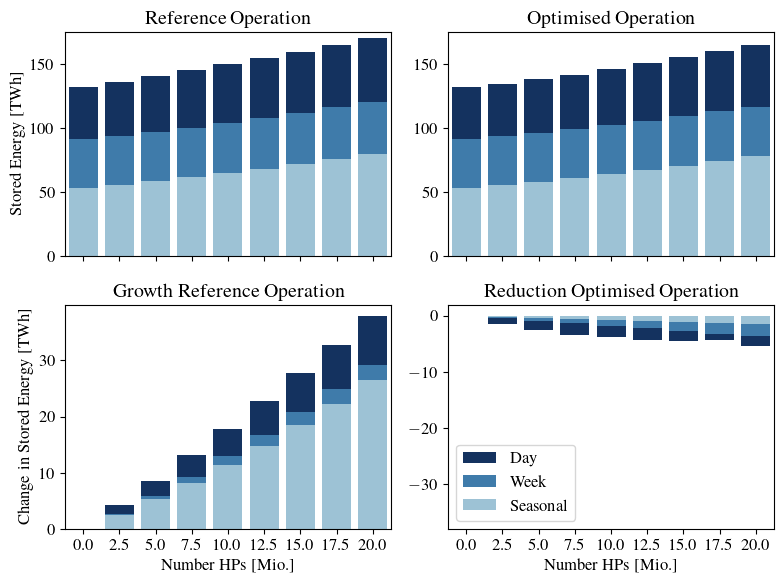

In [56]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
save_dir_tmp = os.path.join(save_dir, "storage_equivalent_HP.pdf")
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)],
                                            save_dir=save_dir_tmp)

In [ ]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", "double_TES", "nr_hp")

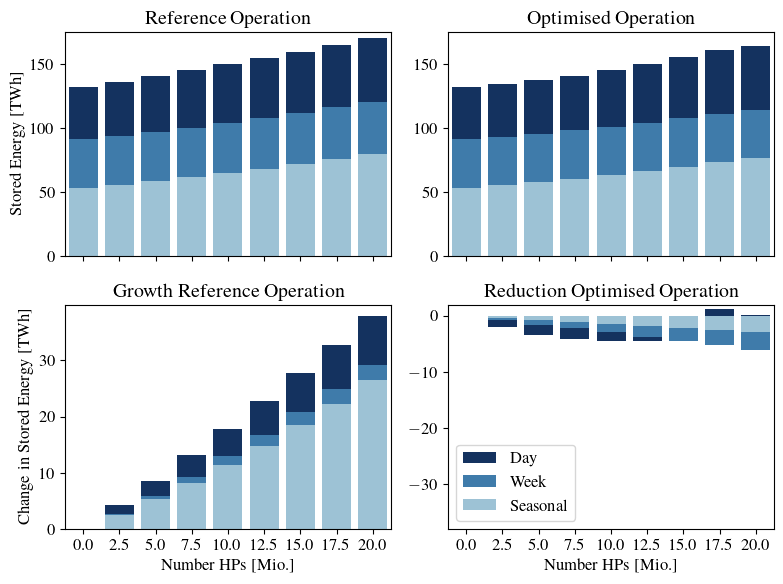

In [68]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)])

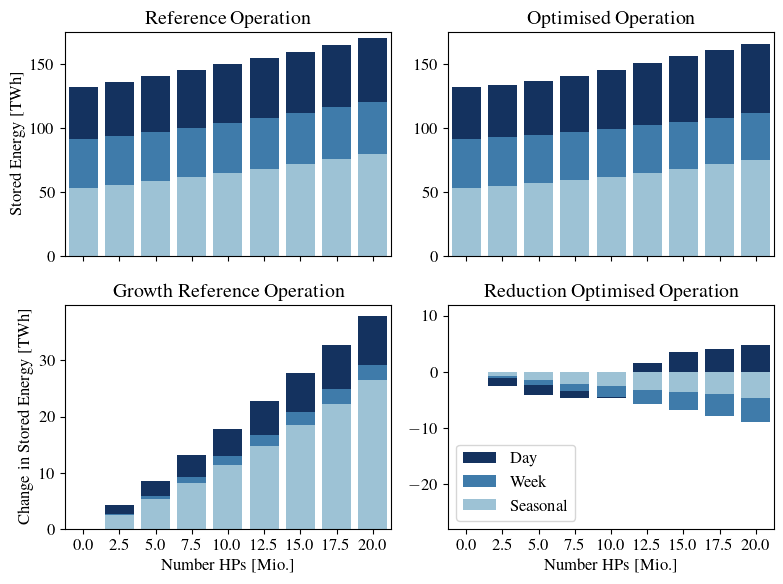

In [109]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", "HP_flexible_four_TES", "nr_hp")
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+11.898, 11.898)])

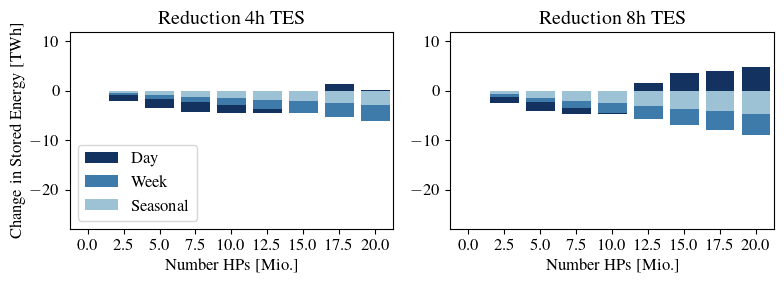

In [22]:
_,_,_, diff_double_TES=load_scenarios_and_diff("HP_reference", "HP_flexible_double_TES", "nr_hp")
_,_,_, diff_four_TES=load_scenarios_and_diff("HP_reference", "HP_flexible_four_TES", "nr_hp")
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Change in Stored Energy [TWh]"
language = "english"
save_dir_tmp = os.path.join(save_dir, "diff_flex_HP.pdf")
plot_storage_equivalent_germany_stacked_two(diff_double_TES,diff_four_TES,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             titles=["Reduction 4h TES", "Reduction 8h TES"], 
                                             ylim = (-39.863+11.898, 11.898),
                                             loc="lower left",
                                             save_dir=save_dir_tmp)

In [23]:
_, growth_flex, _, _=load_scenarios_and_diff("HP_flexible", "HP_flexible_double_TES", "nr_hp")
sum_growth_flex = growth_flex.groupby("nr_hp").sum().drop(columns=["storage_type","nr_ev"])/1000
rel_growth_flex = sum_growth_flex.divide(sum_energy_stored.loc[0, "energy_stored"])
rel_growth_flex

NameError: name 'sum_energy_stored' is not defined

## EV variation

In [57]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("EV_reference", "EV_flexible", "nr_ev")

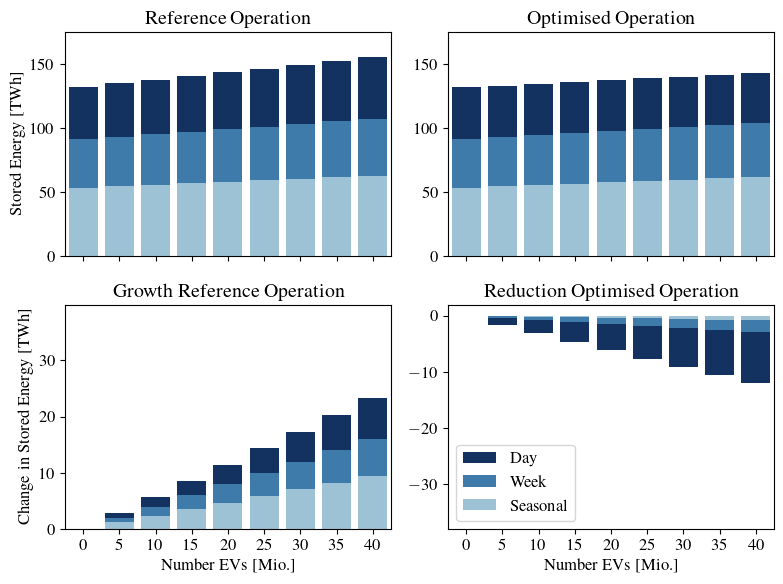

In [58]:
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
save_dir_tmp = os.path.join(save_dir, "storage_equivalent_EV.pdf")
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)],
                                            save_dir=save_dir_tmp)

In [62]:
sum_energy_stored = storage_equivalent_ref.groupby("nr_ev").sum().drop(columns=["storage_type","nr_hp"])/1000
sum_energy_stored

,energy_stored
nr_ev,
0.0,131.840219
5.0,134.658611
10.0,137.514171
15.0,140.396154
20.0,143.300966
25.0,146.230568
30.0,149.181194
35.0,152.150302
40.0,155.136407


In [64]:
sum_growth = growth.groupby("nr_ev").sum().drop(columns=["storage_type","nr_hp"])/1000
sum_growth

,energy_stored
nr_ev,
0.0,0.000000
5.0,2.818392
10.0,5.673953
15.0,8.555936
20.0,11.460747
25.0,14.390349
30.0,17.340975
35.0,20.310084
40.0,23.296188


In [67]:
rel_growth = sum_growth.divide(sum_energy_stored.loc[0, "energy_stored"])
rel_growth

,energy_stored
nr_ev,
0.0,0.000000
5.0,0.021377
10.0,0.043037
15.0,0.064896
20.0,0.086929
25.0,0.109150
30.0,0.131530
35.0,0.154051
40.0,0.176700


In [71]:
_, growth_flex, _, _=load_scenarios_and_diff("EV_flexible", "EV_flexible", "nr_ev")
sum_growth_flex = growth_flex.groupby("nr_ev").sum().drop(columns=["storage_type","nr_hp"])/1000
rel_growth_flex = sum_growth_flex.divide(sum_energy_stored.loc[0, "energy_stored"])
rel_growth_flex

,energy_stored
nr_ev,
0.0,0.000000
5.0,0.009394
10.0,0.019200
15.0,0.029498
20.0,0.040145
25.0,0.051128
30.0,0.062310
35.0,0.073929
40.0,0.085781


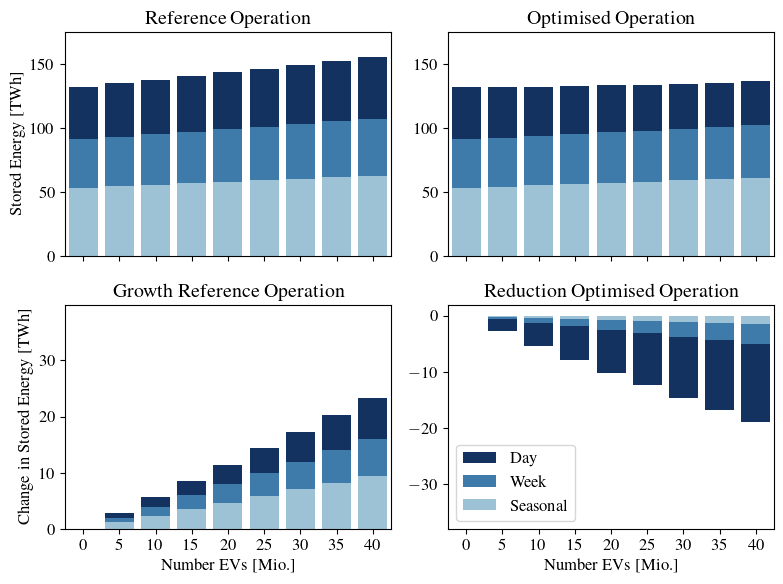

In [6]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("EV_reference", "EV_flexible_with_public",
                                                                                      "nr_ev")
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)])

In [77]:
from scenario_input import base_scenario, scenario_input_hps, save_scenario_dict, \
    scenario_input_evs
from ev_model import scale_electric_vehicles

In [78]:
scenario_dict = base_scenario()
scenario_dict = scenario_input_evs(scenario_dict=scenario_dict, mode="inflexible")
nr_ev_mio = 40
(reference_charging, flexibility_bands) = scale_electric_vehicles(
    nr_ev_mio, scenario_dict)

In [82]:
ev_energy = reference_charging.sum().sum()
ev_energy

90986.7731795231

In [95]:
ev_energy/scenario_dict['ts_demand'].sum().sum()

0.18175362384459678

In [88]:
sum_growth["ev_energy"] = (sum_growth.index * ev_energy/40000).values
(sum_growth["energy_stored"]/sum_growth["ev_energy"]).mean()

0.25228095446895427

<AxesSubplot: xlabel='nr_ev'>

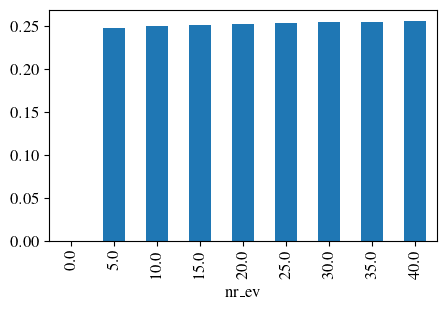

In [96]:
(sum_growth["energy_stored"]/sum_growth["ev_energy"]).plot.bar(figsize=(5,3))

In [92]:
sum_growth_flex["ev_energy"] = (sum_growth_flex.index * ev_energy/40000).values
(sum_growth_flex["energy_stored"]/sum_growth_flex["ev_energy"])

nr_ev
0.0          NaN
5.0     0.108898
10.0    0.111282
15.0    0.113981
20.0    0.116341
25.0    0.118536
30.0    0.120384
35.0    0.122427
40.0    0.124297
dtype: float64

<AxesSubplot: xlabel='nr_ev'>

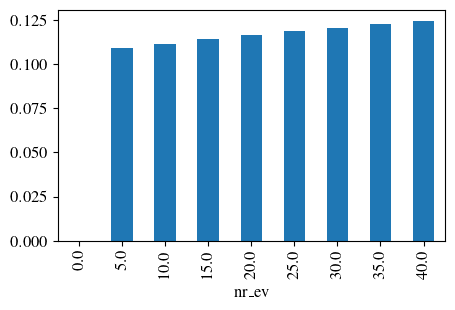

In [97]:
(sum_growth_flex["energy_stored"]/sum_growth_flex["ev_energy"]).plot.bar(figsize=(5,3))

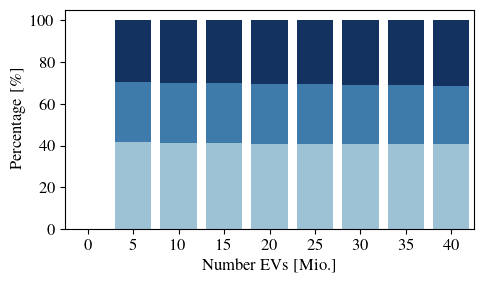

In [111]:
variation_parameter = "nr_ev"
df = growth
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

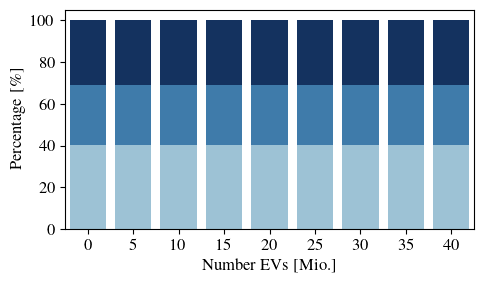

In [108]:
variation_parameter = "nr_ev"
df = storage_equivalent_ref
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

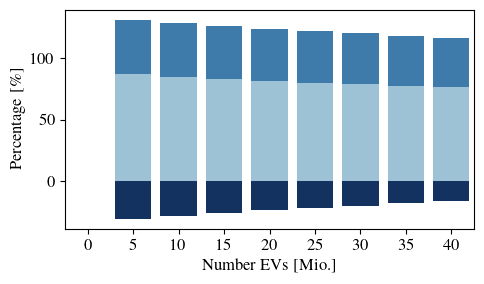

In [110]:
variation_parameter = "nr_ev"
df = growth_flex
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

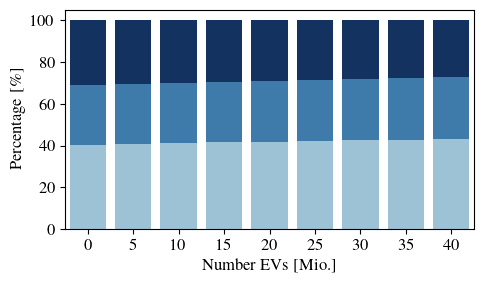

In [109]:
variation_parameter = "nr_ev"
df = storage_equivalent_flex
tmp = get_relative_storage_composition(df, variation_parameter)
tmp["energy_stored"] = tmp["energy_stored"]*1e5
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Percentage [\%]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language
        )

## EV and HP variation

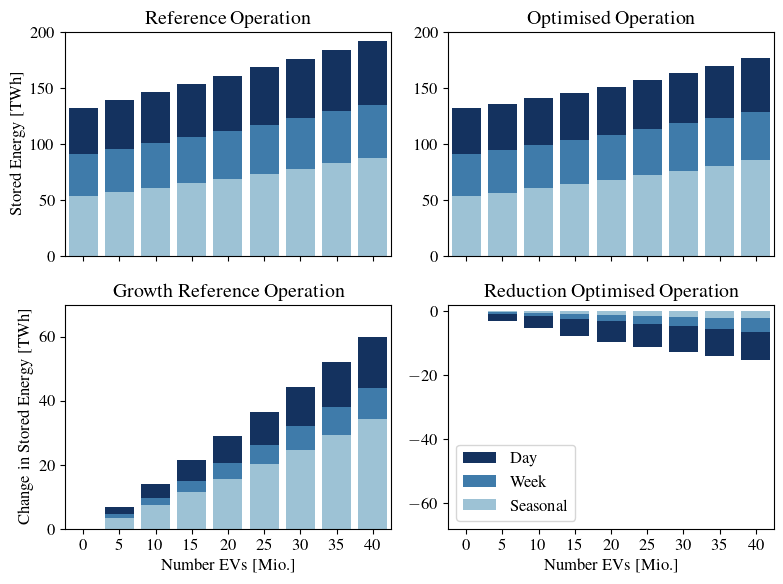

In [107]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("EV_HP_reference", "EV_HP_flexible", "nr_ev")
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 200), (0.0, 69.863), (-69.863+1.898, 1.898)])

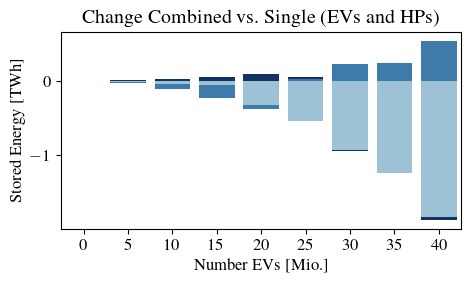

In [118]:
storage_equivalent_ref, growth_both, storage_equivalent_flex, diff_both=load_scenarios_and_diff("EV_HP_reference", "EV_HP_flexible", "nr_ev")
storage_equivalent_ref, growth_ev, storage_equivalent_flex, diff_ev=load_scenarios_and_diff("EV_reference", "EV_flexible", "nr_ev")
storage_equivalent_ref, growth_hp, storage_equivalent_flex, diff_hp=load_scenarios_and_diff("HP_reference", "HP_flexible", "nr_hp")
tmp=growth_both.copy()
tmp["energy_stored"] = (growth_both-(growth_hp + growth_ev))["energy_stored"]
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="Change Combined vs. Single (EVs and HPs)"
        )

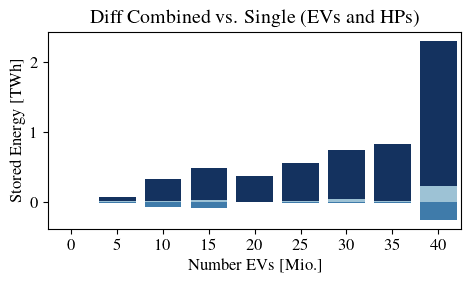

In [119]:
tmp=diff_both.copy()
tmp["energy_stored"] = (diff_both-(diff_hp + diff_ev))["energy_stored"]
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="Diff Combined vs. Single (EVs and HPs)"
        )

#### NOT INTUITIVE: 
Increase with increased flexibility --> Probably comparison has to be between a scenario where both EV and HP are added, respectively one flexible and the other inflexible rather than only one flexible and inflexible.

## Sensitivity weights

In [25]:
scenario = "Sensitivity_Weights"
storage_equivalent = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)

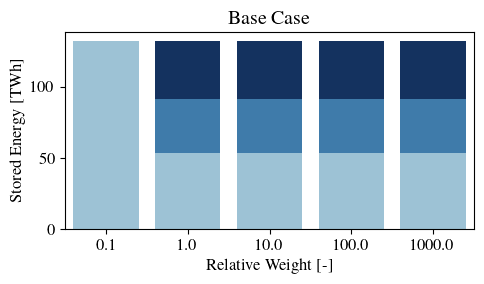

In [26]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="Base Case"
        )

In [33]:
scenario_standard = "HP_flexible"
storage_equivalent_standard = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_standard),
        index_col=0)

In [34]:
storage_equivalent_tmp = pd.concat([storage_equivalent, 
                                    storage_equivalent_standard.loc[storage_equivalent_standard_hp.nr_hp == 0]])
storage_equivalent_tmp=storage_equivalent_tmp.drop(columns=["nr_hp", "nr_ev"])
storage_equivalent_tmp.fillna("Standard", inplace=True)

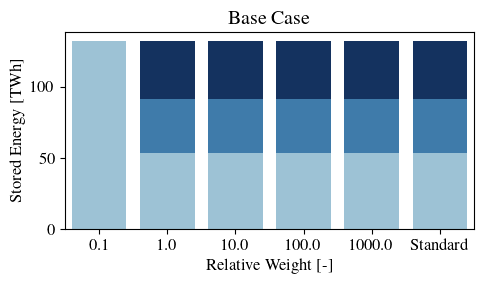

In [35]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_tmp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="Base Case"
        )

In [36]:
scenario = "Sensitivity_Weights_HPs"
storage_equivalent_hp = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)

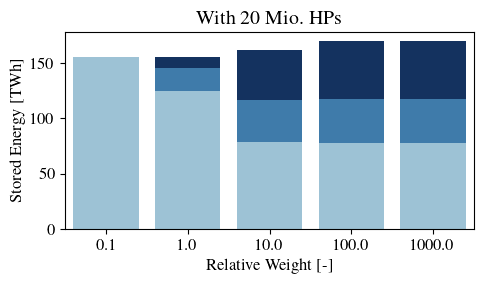

In [37]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_hp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="With 20 Mio. HPs"
        )

In [38]:
scenario_standard = "HP_flexible"
storage_equivalent_standard_hp = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_standard),
        index_col=0)

In [39]:
storage_equivalent_standard_hp.loc[storage_equivalent_standard_hp.nr_hp == 20]

,storage_type,energy_stored,nr_hp,nr_ev
24,0,47800.708014,20.0,0.0
25,1,38381.127980,20.0,0.0
26,2,78171.559606,20.0,0.0


In [40]:
storage_equivalent_tmp_hp = pd.concat([storage_equivalent_hp, 
                                    storage_equivalent_standard_hp.loc[storage_equivalent_standard_hp.nr_hp == 20]])
storage_equivalent_tmp_hp=storage_equivalent_tmp_hp.drop(columns=["nr_hp", "nr_ev"])
storage_equivalent_tmp_hp.fillna("Standard", inplace=True)

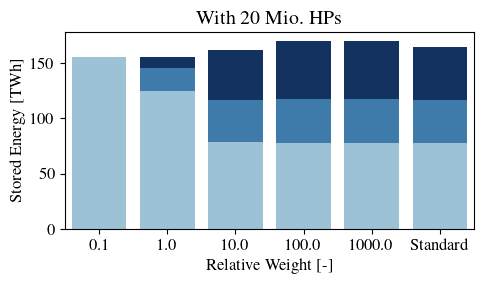

In [41]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_tmp_hp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="With 20 Mio. HPs"
        )

In [42]:
scenario = "Sensitivity_Weights_EVs"
storage_equivalent_ev = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario),
        index_col=0)

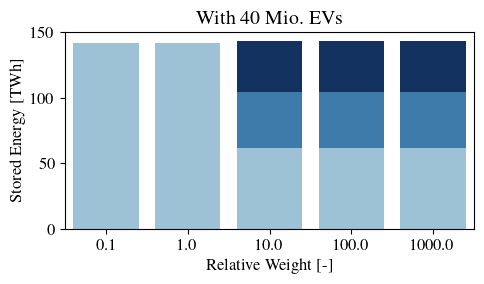

In [43]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_ev,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="With 40 Mio. EVs"
        )

In [44]:
# add data with standard weights
scenario_standard = "EV_flexible"
storage_equivalent_standard_ev = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_standard),
        index_col=0)
storage_equivalent_tmp_ev = pd.concat([storage_equivalent_ev, 
                                    storage_equivalent_standard_ev.loc[storage_equivalent_standard_ev.nr_ev == 40]])
storage_equivalent_tmp_ev=storage_equivalent_tmp_ev.drop(columns=["nr_hp", "nr_ev"])
storage_equivalent_tmp_ev.fillna("Standard", inplace=True)

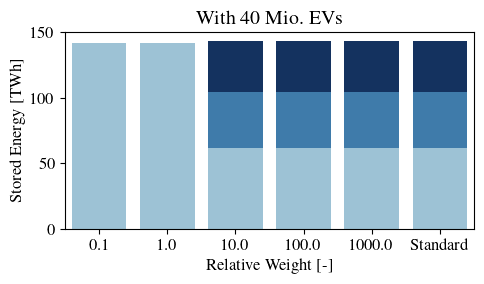

In [45]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_tmp_ev,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            title="With 40 Mio. EVs"
        )

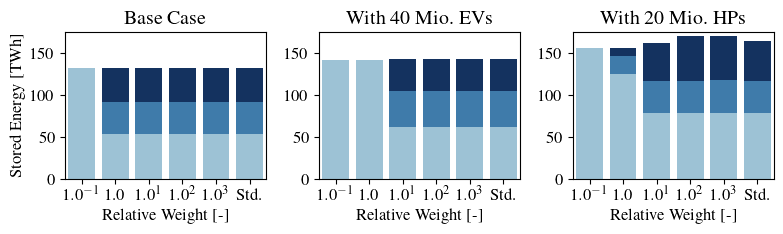

In [59]:
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
rename_dict={0.1: "$1.0^{-1}$", 10: "$1.0^{1}$", 100: "$1.0^{2}$", 1000: "$1.0^{3}$", "Standard": "Std."}
save_dir_tmp = os.path.join(save_dir, "sensitivity_weights.pdf")
plot_storage_equivalent_germany_stacked_three(
    storage_equivalent_tmp.replace(rename_dict), storage_equivalent_tmp_ev.replace(rename_dict), 
    storage_equivalent_tmp_hp.replace(rename_dict),
    parameter=parameter,
    ylabel=ylabel,
    loc=None,
    language=language,
    ylim=(0, 175),
    save_dir=save_dir_tmp
)

### Check HP increase with different weights

In [24]:
scenario_HP_weights = "HP_relative_weight_1000"
storage_equivalent_HP1000 = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_HP_weights),
        index_col=0)

In [27]:
storage_equivalent_standard_hp-storage_equivalent_HP1000

,storage_type,energy_stored,nr_hp,nr_ev
0,0,0.000000e+00,0.0,0.0
1,0,0.000000e+00,0.0,0.0
2,0,-1.455192e-11,0.0,0.0
3,0,-2.098231e+02,0.0,0.0
4,0,-1.866955e+02,0.0,0.0
5,0,1.704744e+00,0.0,0.0
6,0,-5.928312e+02,0.0,0.0
7,0,-3.481977e+02,0.0,0.0
8,0,3.542847e+00,0.0,0.0
9,0,-1.036636e+03,0.0,0.0


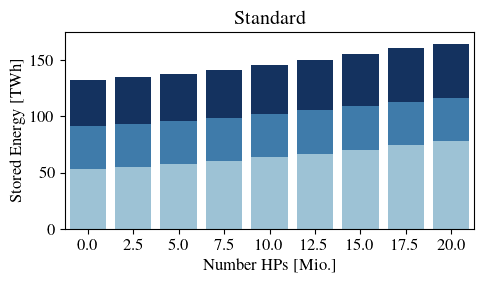

In [28]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_standard_hp,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            ylim=(0, 175),
            language=language,
            title="Standard"
        )

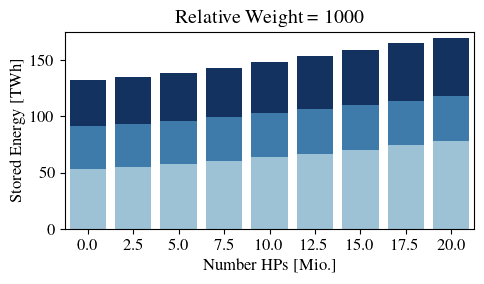

In [29]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_HP1000,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            ylim=(0, 175),
            language=language,
            title="Relative Weight = 1000"
        )

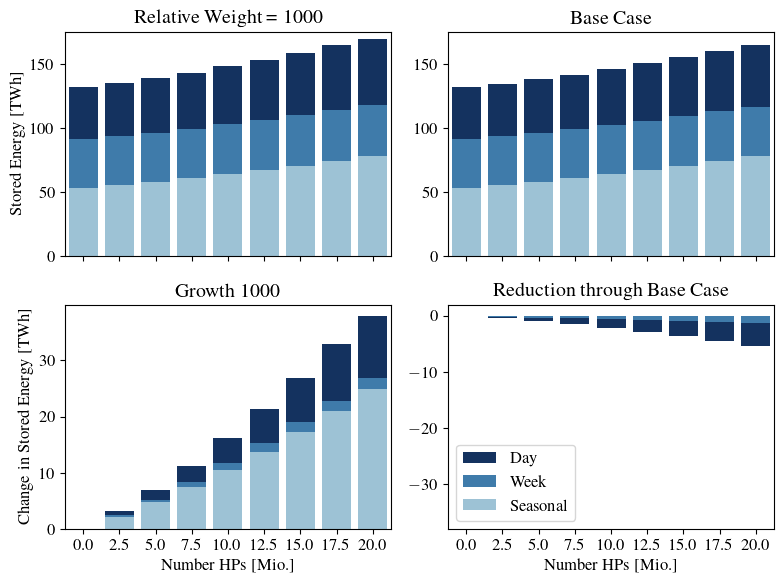

In [89]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=\
    load_scenarios_and_diff("HP_relative_weight_1000", "HP_flexible", "nr_hp")
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)],
                                             titles = ["Relative Weight = 1000", "Base Case", "Growth 1000", "Reduction through Base Case"])

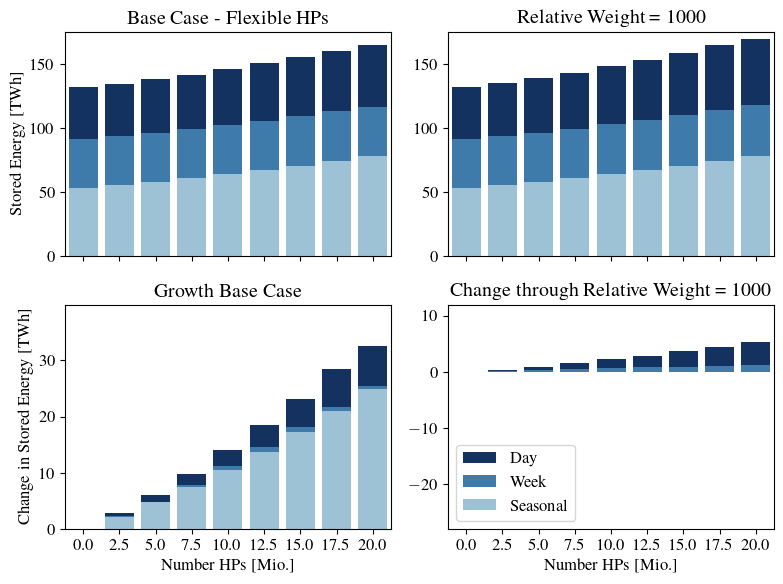

In [92]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=\
    load_scenarios_and_diff("HP_flexible", "HP_relative_weight_1000", "nr_hp")
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+11.898, 11.898)],
                                             titles = ["Base Case - Flexible HPs", "Relative Weight = 1000", "Growth Base Case", "Change through Relative Weight = 1000"])

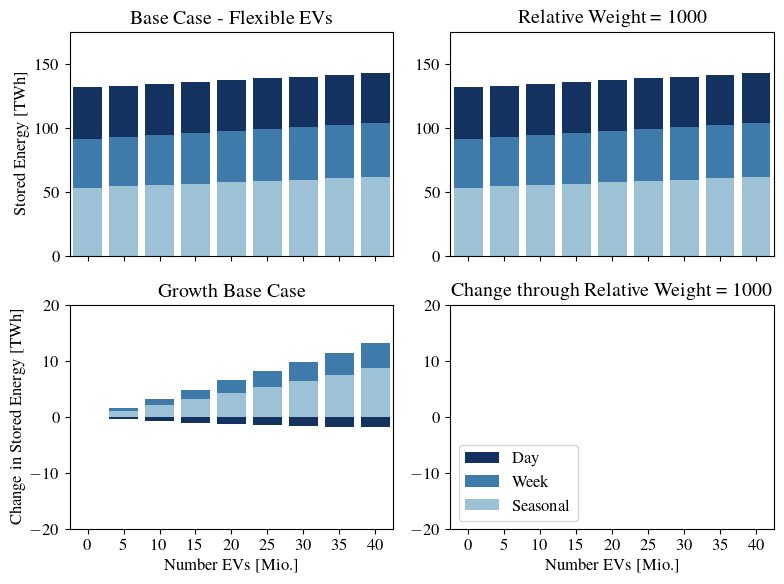

In [94]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=\
    load_scenarios_and_diff("EV_flexible", "EV_relative_weight_1000", "nr_ev")
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (-20, 20), (-20, 20)],
                                             titles = ["Base Case - Flexible EVs", "Relative Weight = 1000", "Growth Base Case", "Change through Relative Weight = 1000"])

# Timeseries visualisation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [33]:
vres = pd.read_csv("data/vres_reference_ego100.csv", index_col=0,
                       parse_dates=True).divide(1000)

<AxesSubplot: >

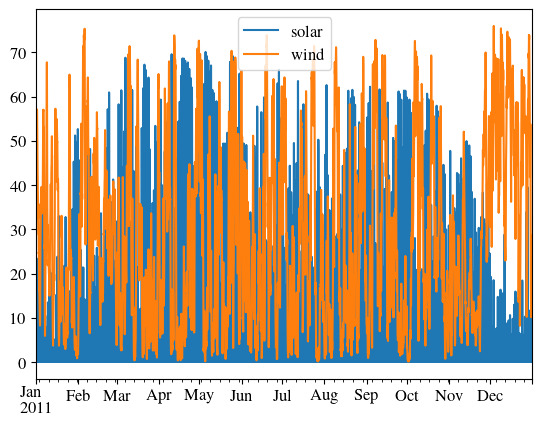

In [34]:
vres[["solar", "wind"]].plot()

In [35]:
df_plot = vres.copy()
df_plot["Month"] = df_plot.index.month
df_plot["Hour"] = df_plot.index.hour
df_plot = df_plot.groupby(["Month", "Hour"]).mean().unstack()

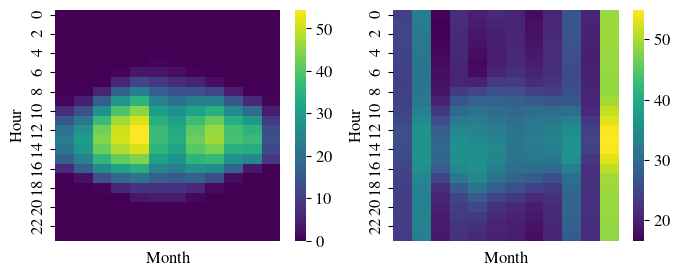

In [36]:
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot["solar"].T, cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot["wind"].T, cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)

In [37]:
df_plot = vres.copy()
df_plot["Week"] = df_plot.index.week
df_plot["Hour"] = df_plot.index.hour
df_plot = df_plot.groupby(["Week", "Hour"]).mean().unstack()

C:\Users\aheider\AppData\Local\Temp\ipykernel_9676\802069538.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_plot["Week"] = df_plot.index.week


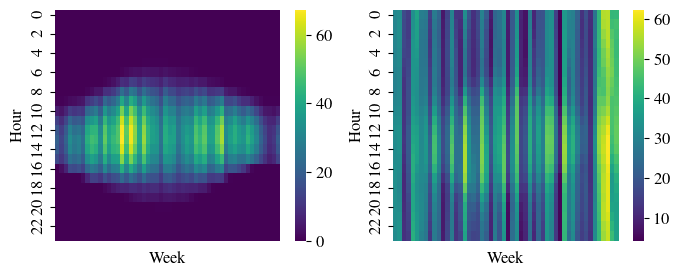

In [38]:
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot["solar"].T, cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot["wind"].T, cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)

In [41]:
df_plot = vres.copy()
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()

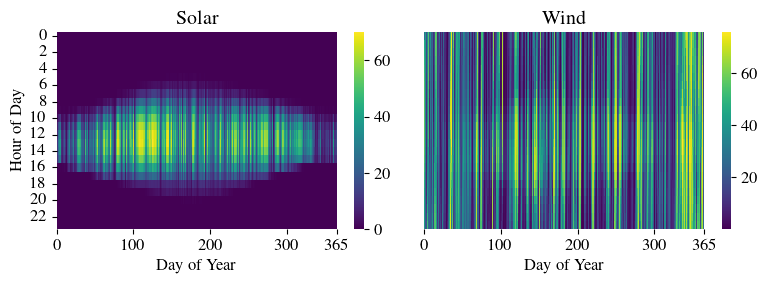

In [61]:
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot["solar"], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot["wind"], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title("Solar")
ax[1].set_title("Wind")
plt.tight_layout()
plt.savefig("results/plots/vres_heatmap.pdf")

In [3]:
from scenario_input import scenario_input_hps, scenario_input_evs, base_scenario
from heat_pump_model import scale_heat_pumps
from ev_model import scale_electric_vehicles

In [4]:
scenario_dict = base_scenario()
# import HP data
scenario_dict = scenario_input_hps(scenario_dict=scenario_dict, mode="inflexible")
nr_hp_mio = 20
(capacity_tes, p_nom_hp,
 ts_heat_demand, ts_heat_el, sum_energy_heat) = \
    scale_heat_pumps(nr_hp_mio=nr_hp_mio,
                     scenario_dict=scenario_dict)
# import EV data
scenario_dict = scenario_input_evs(scenario_dict=scenario_dict, mode="inflexible", extended_flex=False)
ref_charging = (pd.read_csv(
        r"data/ref_charging_use_case.csv", index_col=0, parse_dates=True) / 1e3).resample(
        scenario_dict["time_increment"]).mean()
scenario_dict["ts_ref_charging"] = ref_charging
nr_ev_mio = 40
(reference_charging, flexibility_bands) = scale_electric_vehicles(
    nr_ev_mio, scenario_dict)

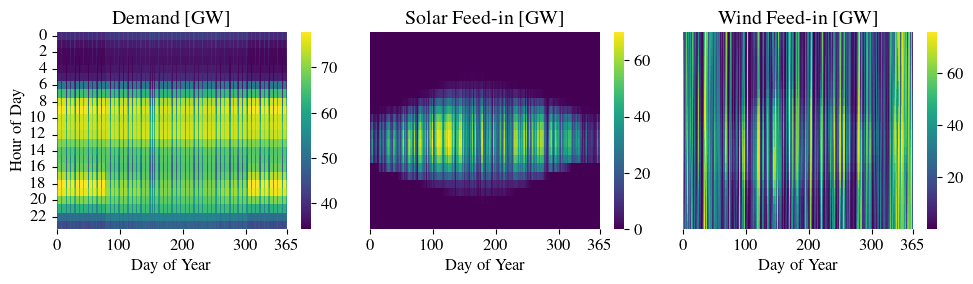

In [96]:
# plot input open_ego
# Todo: Demand minimum at 0, revert y-axis
df_plot = vres.copy()
df_plot["Demand"] = scenario_dict["ts_demand"].sum(axis=1)
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (10, 3)
fig, ax =  plt.subplots(1, 3, figsize=figsize)
g = sns.heatmap(df_plot["Demand"], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot["solar"], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot["wind"], cmap='viridis', xticklabels=False, ax=ax[2],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[2].set_ylabel("")
ax[2].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[2].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title("Demand [GW]")
ax[1].set_title("Solar Feed-in [GW]")
ax[2].set_title("Wind Feed-in [GW]")
plt.tight_layout()
plt.savefig("results/plots/ego_input_heatmap.pdf")

Text(0.5, 1.0, 'retail')

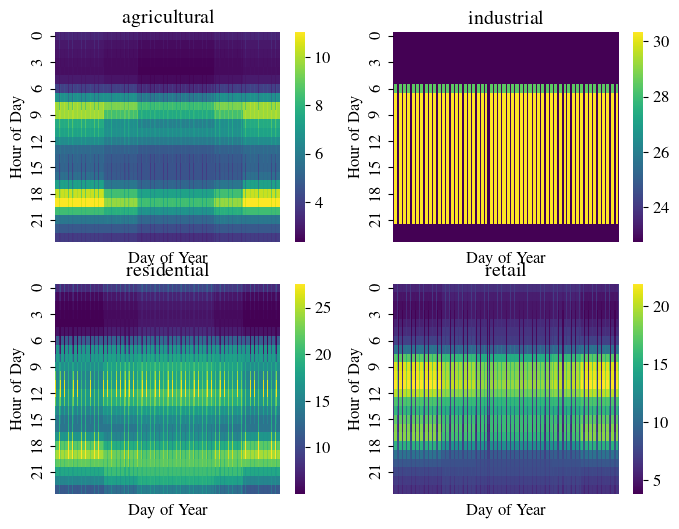

In [74]:
df_plot = scenario_dict["ts_demand"].copy()
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 6)
fig, ax =  plt.subplots(2, 2, figsize=figsize)
title1="agricultural"
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[(0,0)],
                       cbar=True, linewidths=0)
ax[(0,0)].set_title(title1)
title2="industrial"
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[(0,1)],
                       cbar=True, linewidths=0)
ax[(0,1)].set_title(title2)
title3="residential"
g = sns.heatmap(df_plot[title3], cmap='viridis', xticklabels=False, ax=ax[(1,0)],
                       cbar=True, linewidths=0)
ax[(1,0)].set_title(title3)
title4="retail"
g = sns.heatmap(df_plot[title4], cmap='viridis', xticklabels=False, ax=ax[(1,1)],
                       cbar=True, linewidths=0)
ax[(1,1)].set_title(title4)

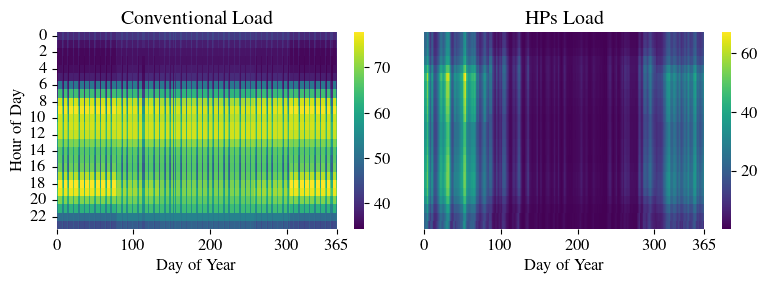

In [76]:
df_plot = pd.DataFrame()
title1 = "Conventional Load"
title2 = "HPs Load"
df_plot[title1] = scenario_dict["ts_demand"].sum(axis=1)
df_plot[title2] = ts_heat_el
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()

Text(0.5, 1.0, 'hpc')

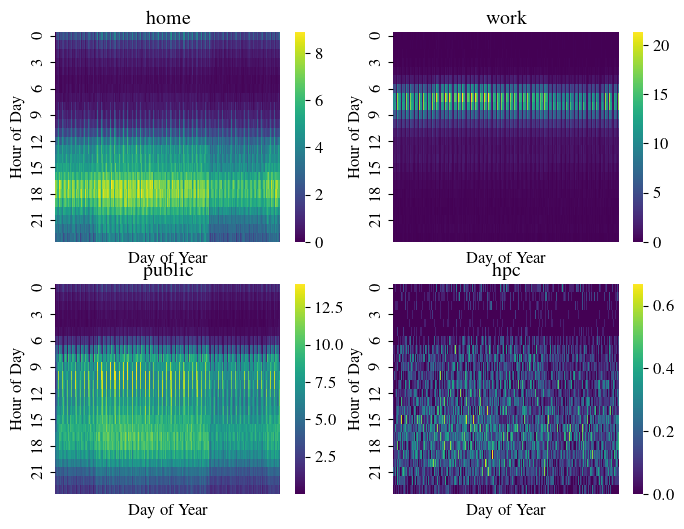

In [82]:
df_plot = reference_charging.copy()
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 6)
fig, ax =  plt.subplots(2, 2, figsize=figsize)
title1="home"
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[(0,0)],
                       cbar=True, linewidths=0)
ax[(0,0)].set_title(title1)
title2="work"
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[(0,1)],
                       cbar=True, linewidths=0)
ax[(0,1)].set_title(title2)
title3="public"
g = sns.heatmap(df_plot[title3], cmap='viridis', xticklabels=False, ax=ax[(1,0)],
                       cbar=True, linewidths=0)
ax[(1,0)].set_title(title3)
title4="hpc"
g = sns.heatmap(df_plot[title4], cmap='viridis', xticklabels=False, ax=ax[(1,1)],
                       cbar=True, linewidths=0)
ax[(1,1)].set_title(title4)

In [89]:
# import EV data - default
scenario_dict = scenario_input_evs(scenario_dict=scenario_dict, mode="flexible")
nr_ev_mio = 40
(reference_charging, flexibility_bands) = scale_electric_vehicles(
    nr_ev_mio, scenario_dict)

In [91]:
flexibility_bands["upper_energy"]

,home,work
2011-01-01 00:00:00,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.012323
2011-01-01 02:00:00,0.000000,0.039018
2011-01-01 03:00:00,0.000000,0.107796
2011-01-01 04:00:00,0.000000,0.428613
...,...,...
2011-12-31 19:00:00,23578.787202,13683.049107
2011-12-31 20:00:00,23583.561012,13683.181548
2011-12-31 21:00:00,23587.386905,13683.339286
2011-12-31 22:00:00,23590.912202,13683.607143


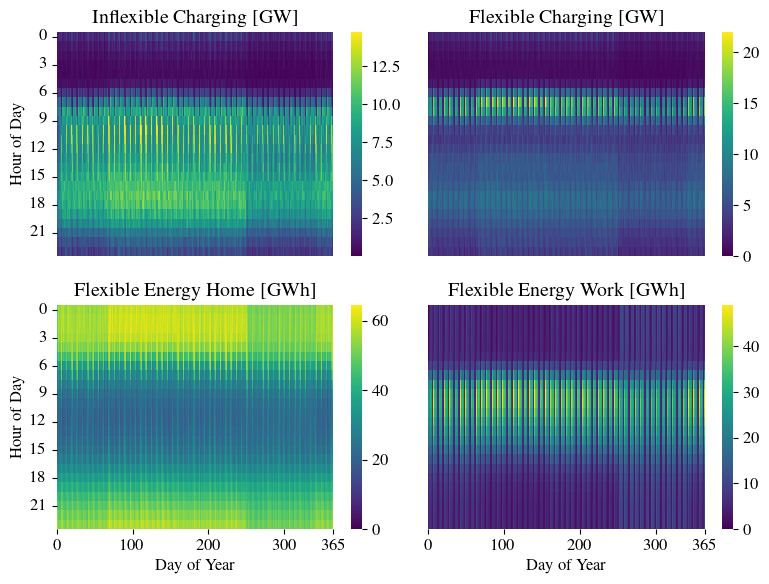

In [102]:
df_plot = pd.DataFrame()
title1="Inflexible Charging [GW]"
title2="Flexible Charging [GW]"
title3="Flexible Energy Home [GWh]"
title4="Flexible Energy Work [GWh]"
df_plot[title1] = reference_charging["inflexible"]
df_plot[title2] = reference_charging["flex"]
df_plot[title3] = flexibility_bands["upper_energy"]["home"] - flexibility_bands["lower_energy"] ["home"]
df_plot[title4] = flexibility_bands["upper_energy"]["work"] - flexibility_bands["lower_energy"] ["work"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 6)
fig, ax =  plt.subplots(2, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[(0,0)],
                       cbar=True, linewidths=0)
ax[(0,0)].set_title(title1)

g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[(0,1)],
                       cbar=True, linewidths=0)
ax[(0,1)].set_title(title2)

g = sns.heatmap(df_plot[title3], cmap='viridis', xticklabels=False, ax=ax[(1,0)],
                       cbar=True, linewidths=0)
ax[(1,0)].set_title(title3)
g = sns.heatmap(df_plot[title4], cmap='viridis', xticklabels=False, ax=ax[(1,1)],
                       cbar=True, linewidths=0)
ax[(1,1)].set_title(title4)
ax[(1,1)].set_ylabel("")
ax[(1,1)].set_yticks([])
ax[(0,1)].set_ylabel("")
ax[(0,1)].set_yticks([])
ax[(0,0)].set_yticklabels(ax[(0,0)].get_yticklabels(), rotation=0)
ax[(1,0)].set_yticklabels(ax[(1,0)].get_yticklabels(), rotation=0)
ax[(1,0)].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[(1,1)].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[(0,1)].set_xlabel("")
ax[(0,0)].set_xlabel("")
plt.tight_layout()
plt.savefig("results/plots/evs_heatmap.pdf")

In [93]:
reference_charging

,flex,inflexible
2011-01-01 00:00:00,0.000000,0.008185
2011-01-01 01:00:00,0.013692,0.024554
2011-01-01 02:00:00,0.029662,0.018821
2011-01-01 03:00:00,0.076420,0.018889
2011-01-01 04:00:00,0.356463,0.102914
...,...,...
2011-12-31 19:00:00,7.163178,8.342226
2011-12-31 20:00:00,5.434302,6.163806
2011-12-31 21:00:00,4.416216,5.293678
2011-12-31 22:00:00,4.210304,4.148517


In [5]:
# import EV data
scenario_dict = scenario_input_evs(scenario_dict=scenario_dict, mode="flexible", extended_flex=True)
ref_charging = (pd.read_csv(
        r"data/ref_charging_use_case.csv", index_col=0, parse_dates=True) / 1e3).resample(
        scenario_dict["time_increment"]).mean()
scenario_dict["ts_ref_charging"] = ref_charging
nr_ev_mio = 40
(reference_charging, flexibility_bands) = scale_electric_vehicles(
    nr_ev_mio, scenario_dict)

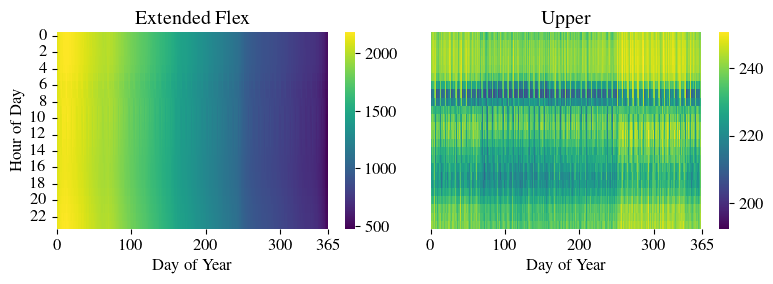

In [6]:
df_plot = pd.DataFrame()
title1 = "Extended Flex"
title2 = "Upper"
df_plot[title1] = flexibility_bands["upper_energy"]["extended"] - flexibility_bands["lower_energy"] ["extended"]
df_plot[title2] = flexibility_bands["upper_power"]["extended"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()

In [155]:
# Load energy level of heat pump
lower_bound=pd.read_csv("data/minimize_energy_level.csv", index_col=0, parse_dates=True)
upper_bound=pd.read_csv("data/maximize_energy_level.csv", index_col=0, parse_dates=True)

<AxesSubplot: >

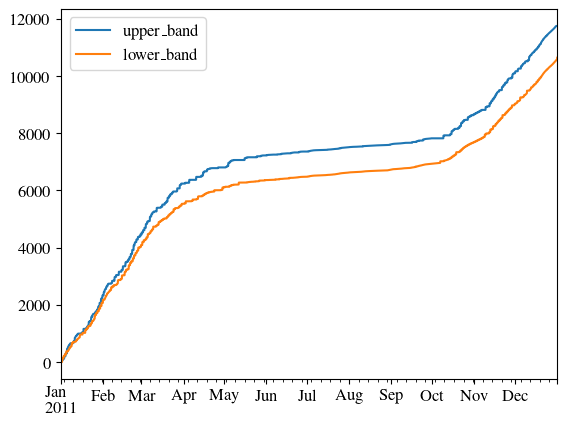

In [157]:
tmp = pd.DataFrame()
tmp["upper_band"] = upper_bound
tmp["lower_band"] = lower_bound
tmp.index = reference_charging.index
tmp.plot()

<AxesSubplot: >

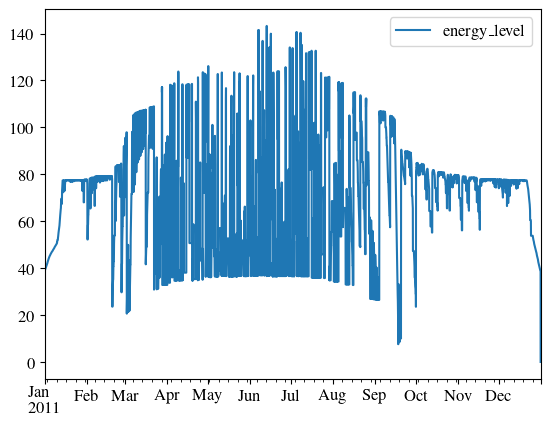

In [140]:
tmp = upper_bound-lower_bound
tmp.index = reference_charging.index
tmp.plot()

<AxesSubplot: >

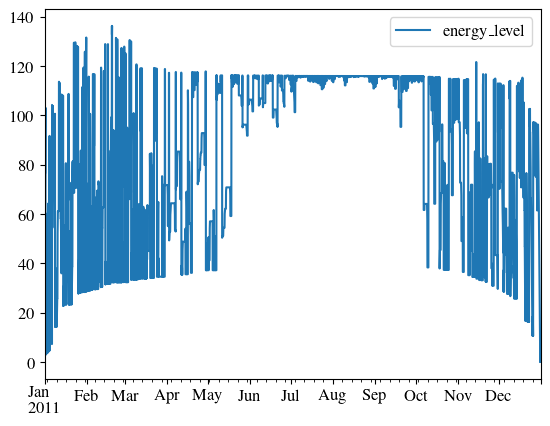

In [138]:
tmp = upper_bound-lower_bound
tmp.index = reference_charging.index
tmp.plot()

<AxesSubplot: >

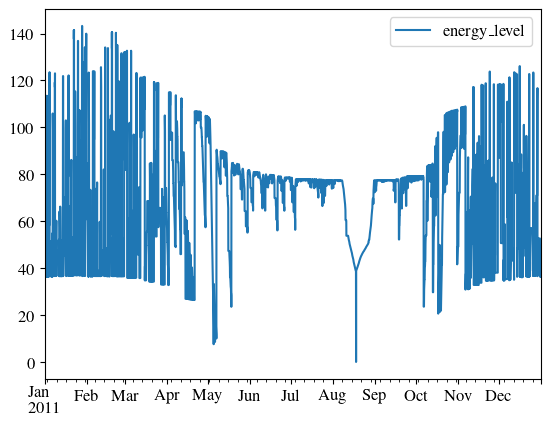

In [141]:
tmp = pd.concat([upper_bound[3260:], upper_bound[:3260]])-pd.concat([lower_bound[3260:], lower_bound[:3260]])
tmp.index = reference_charging.index
tmp.plot()

In [115]:
lower_bound.max()

energy_level    10639.094336
dtype: float64

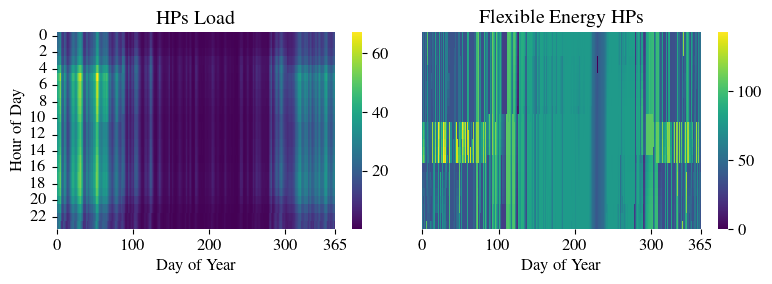

In [143]:
df_plot = pd.DataFrame()
title1 = "HPs Load"
title2 = "Flexible Energy HPs"
df_plot[title1] = ts_heat_el
df_plot[title2] = tmp["energy_level"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()
#plt.savefig("results/plots/hps_heatmap.pdf")

In [126]:
index = pd.date_range("2011-01-01", freq="1h", periods=8760)
index[5500]

Timestamp('2011-08-18 04:00:00', freq='H')

In [127]:
8760-5500

3260

In [144]:
tmp = ts_heat_el.cumsum()

<AxesSubplot: >

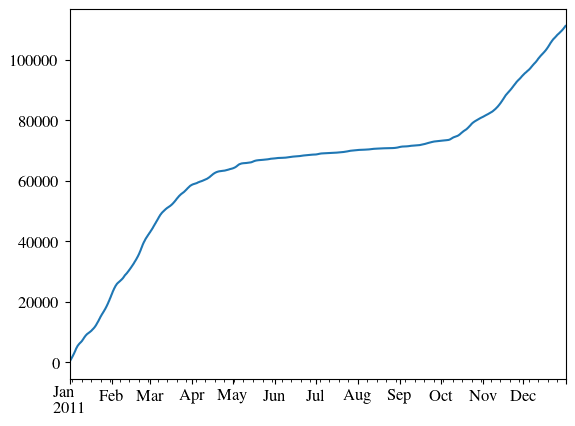

In [145]:
tmp.plot()

<AxesSubplot: >

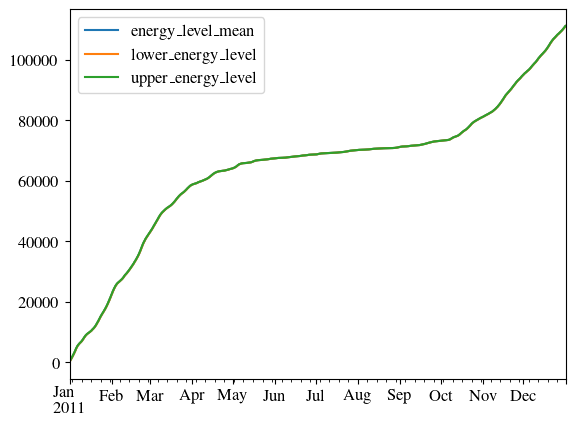

In [153]:
storage_time = 2 # hours
df_energy_bands = pd.DataFrame()
df_energy_bands["energy_level_mean"] = tmp
df_energy_bands["lower_energy_level"] = 0
df_energy_bands.loc[df_energy_bands.index[storage_time:], "lower_energy_level"] = tmp[:-storage_time].values
df_energy_bands["upper_energy_level"] = tmp[-1]
df_energy_bands.loc[df_energy_bands.index[:-storage_time], "upper_energy_level"] = tmp[storage_time:].values
df_energy_bands.plot()

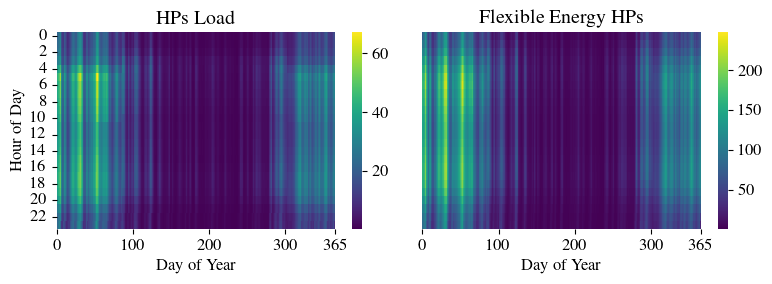

In [154]:
df_plot = pd.DataFrame()
title1 = "HPs Load"
title2 = "Flexible Energy HPs"
df_plot[title1] = ts_heat_el
df_plot[title2] = df_energy_bands["upper_energy_level"]-df_energy_bands["lower_energy_level"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()
plt.savefig("results/plots/hps_heatmap.pdf")

<AxesSubplot: >

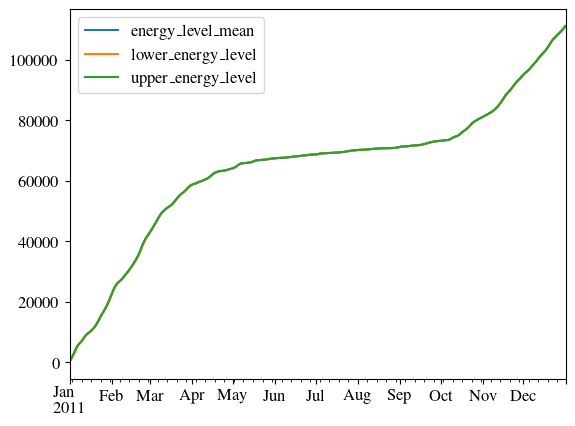

In [159]:
tmp = ts_heat_el.cumsum()
storage_time = 4 # hours
df_energy_bands = pd.DataFrame()
df_energy_bands["energy_level_mean"] = tmp
df_energy_bands["lower_energy_level"] = 0
df_energy_bands.loc[df_energy_bands.index[storage_time:], "lower_energy_level"] = tmp[:-storage_time].values
df_energy_bands["upper_energy_level"] = tmp[-1]
df_energy_bands.loc[df_energy_bands.index[:-storage_time], "upper_energy_level"] = tmp[storage_time:].values
df_energy_bands.plot()

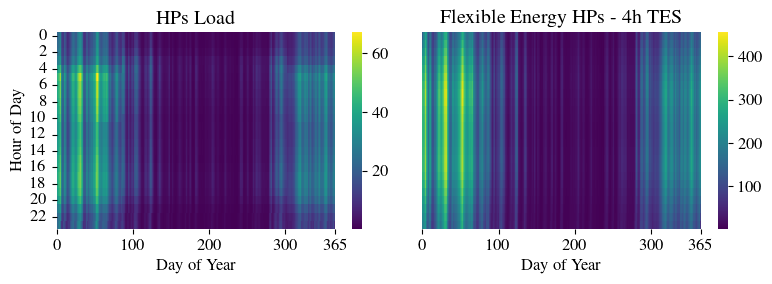

In [161]:
df_plot = pd.DataFrame()
title1 = "HPs Load"
title2 = "Flexible Energy HPs - 4h TES"
df_plot[title1] = ts_heat_el
df_plot[title2] = df_energy_bands["upper_energy_level"]-df_energy_bands["lower_energy_level"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()

<AxesSubplot: >

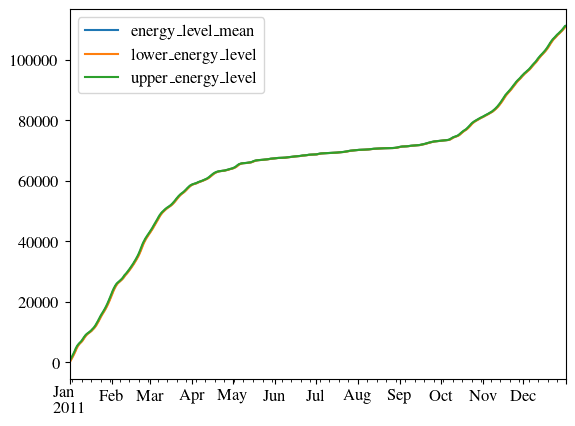

In [162]:
tmp = ts_heat_el.cumsum()
storage_time = 8 # hours
df_energy_bands = pd.DataFrame()
df_energy_bands["energy_level_mean"] = tmp
df_energy_bands["lower_energy_level"] = 0
df_energy_bands.loc[df_energy_bands.index[storage_time:], "lower_energy_level"] = tmp[:-storage_time].values
df_energy_bands["upper_energy_level"] = tmp[-1]
df_energy_bands.loc[df_energy_bands.index[:-storage_time], "upper_energy_level"] = tmp[storage_time:].values
df_energy_bands.plot()

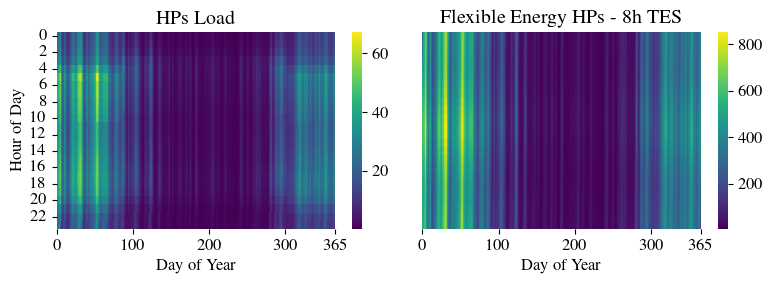

In [163]:
df_plot = pd.DataFrame()
title1 = "HPs Load"
title2 = "Flexible Energy HPs - 8h TES"
df_plot[title1] = ts_heat_el
df_plot[title2] = df_energy_bands["upper_energy_level"]-df_energy_bands["lower_energy_level"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (8, 3)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()

# Plot time series

In [7]:
vres = pd.read_csv(r"data/vres_reference_ego100.csv", index_col=0,
                       parse_dates=True).divide(1000)
demand = pd.read_csv(r"data/demand_germany_ego100.csv", index_col=0,
                     parse_dates=True)

# Over capacities

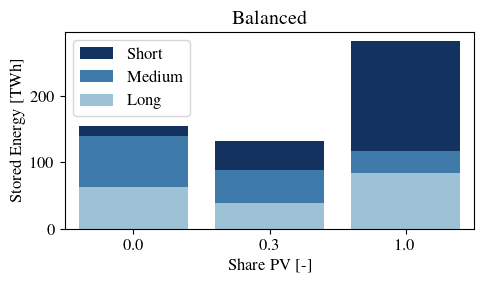

In [29]:
scenario = "test_share_gen"
share_gen_to_load = 1.0
storage_equivalent = pd.read_csv(
        f"results/two_weeks_weight_one/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load],
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title="Balanced"
        )

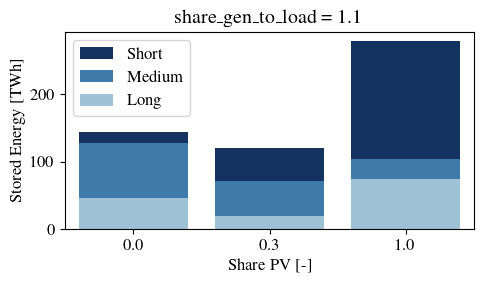

In [12]:
scenario = "test_share_gen"
share_gen_to_load = 1.2
storage_equivalent = pd.read_csv(
        f"results/two_weeks_weight_one/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load],
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}"
        )

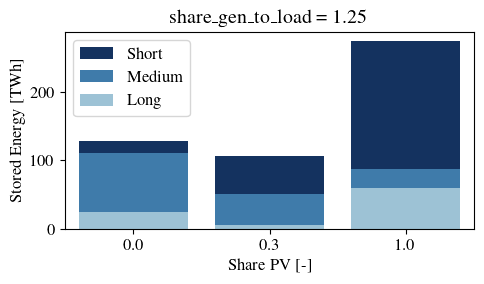

In [33]:
scenario = "test_share_gen"
share_gen_to_load = 1.25
storage_equivalent = pd.read_csv(
        f"results/two_weeks_weight_one/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load],
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}"
        )

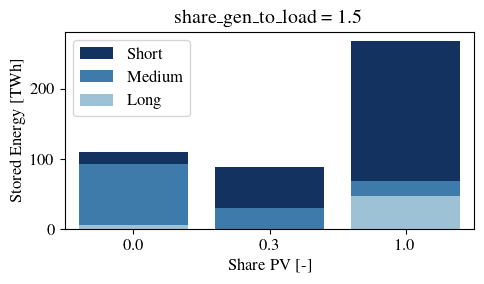

In [34]:
scenario = "test_share_gen"
share_gen_to_load = 1.5
storage_equivalent = pd.read_csv(
        f"results/two_weeks_weight_one/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"share_pv": "Share PV [-]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load],
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}"
        )

<AxesSubplot: xlabel='share_pv', ylabel='energy_stored'>

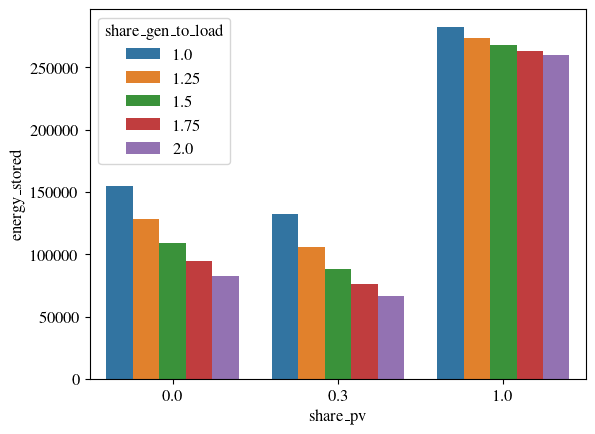

In [35]:
plot_df = storage_equivalent.groupby(["share_pv", "share_gen_to_load"]).sum().reset_index()
sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored")

<AxesSubplot: title={'center': 'Short-term storage'}, xlabel='share_pv', ylabel='energy_stored'>

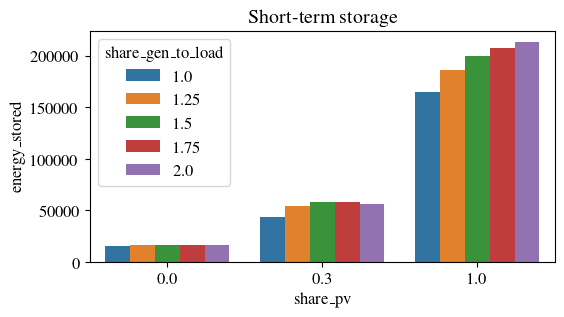

In [45]:
plot_df = storage_equivalent.loc[storage_equivalent.storage_type==0].groupby(["share_pv", "share_gen_to_load"]).sum().reset_index()
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Short-term storage")
sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored", ax=ax)

<AxesSubplot: title={'center': 'Medium-term storage'}, xlabel='share_pv', ylabel='energy_stored'>

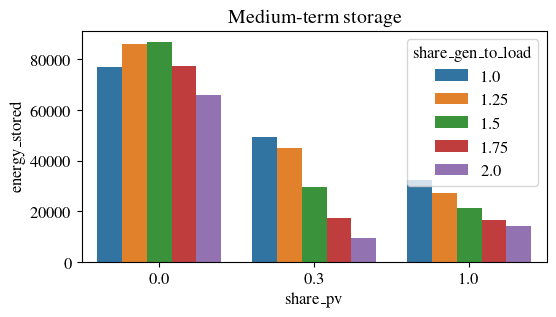

In [46]:
plot_df = storage_equivalent.loc[storage_equivalent.storage_type==1].groupby(["share_pv", "share_gen_to_load"]).sum().reset_index()
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Medium-term storage")
sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored", ax=ax)

<AxesSubplot: title={'center': 'Long-term storage'}, xlabel='share_pv', ylabel='energy_stored'>

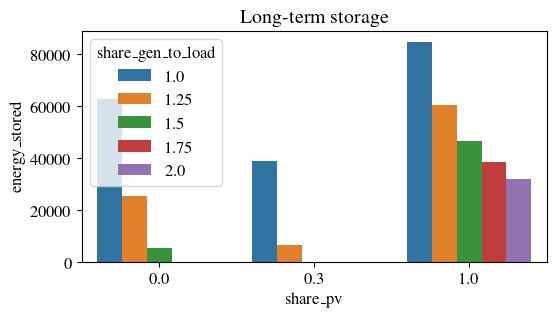

In [47]:
plot_df = storage_equivalent.loc[storage_equivalent.storage_type==2].groupby(["share_pv", "share_gen_to_load"]).sum().reset_index()
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Long-term storage")
sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored", ax=ax)

In [25]:
share_gen_to_load_ref = 1.0
share_gen_to_load = 1.1
par = "energy_stored"
tmp = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load]
tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\
    storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load_ref, par]
tmp

C:\Users\aheider\AppData\Local\Temp\ipykernel_7400\2866319096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\


,storage_type,energy_stored,share_pv,share_gen_to_load
0,0,841.195278,0.0,1.1
1,1,4225.445311,0.0,1.1
2,2,-16932.617697,0.0,1.1
0,0,4867.056728,0.3,1.1
1,1,2564.093316,0.3,1.1
2,2,-19496.326125,0.3,1.1
0,0,9589.633984,1.0,1.1
1,1,-2550.686339,1.0,1.1
2,2,-10834.698958,1.0,1.1


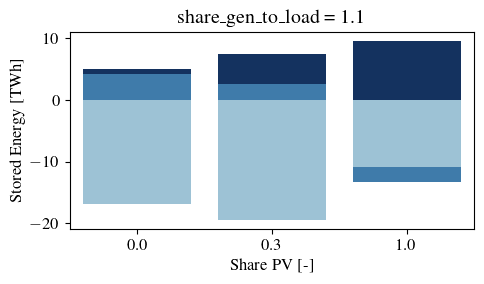

In [27]:
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}",
            loc=None
        )

C:\Users\aheider\AppData\Local\Temp\ipykernel_7400\1783874835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\


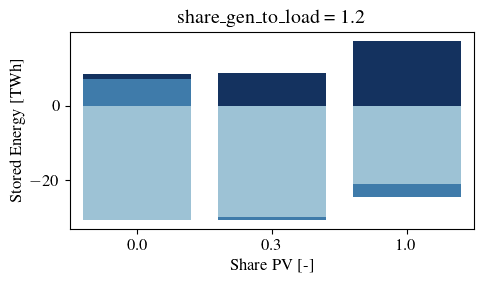

In [28]:
share_gen_to_load_ref = 1.0
share_gen_to_load = 1.2
par = "energy_stored"
tmp = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load]
tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\
    storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load_ref, par]
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}",
            loc=None
        )

C:\Users\aheider\AppData\Local\Temp\ipykernel_7400\404097818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\


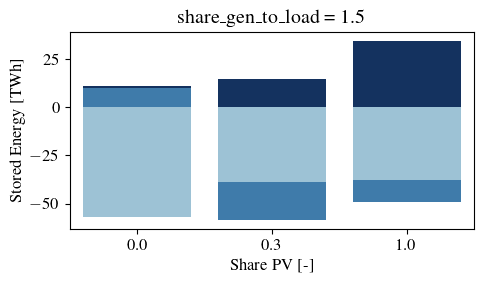

In [36]:
share_gen_to_load_ref = 1.0
share_gen_to_load = 1.5
par = "energy_stored"
tmp = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load]
tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\
    storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load_ref, par]
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}",
            loc=None
        )

C:\Users\aheider\AppData\Local\Temp\ipykernel_7400\3534128575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\


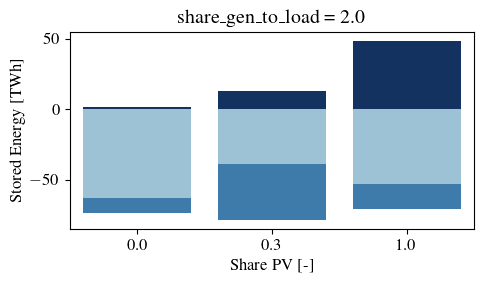

In [37]:
share_gen_to_load_ref = 1.0
share_gen_to_load = 2.0
par = "energy_stored"
tmp = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load]
tmp[par] = storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load, par]-\
    storage_equivalent.loc[storage_equivalent.share_gen_to_load==share_gen_to_load_ref, par]
plot_storage_equivalent_germany_stacked(
            tmp,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=f"share_gen_to_load = {share_gen_to_load}",
            loc=None
        )

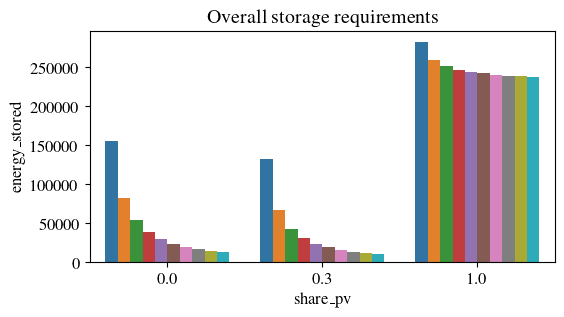

In [55]:
scenario = "test_share_gen_2"
storage_equivalent = pd.read_csv(
        f"results/two_weeks_weight_one/{scenario}/storage_equivalents.csv",
        index_col=0)
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Overall storage requirements")
plot_df = storage_equivalent.groupby(["share_pv", "share_gen_to_load"]).sum().reset_index()
sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored", ax=ax)
ax.legend().remove()

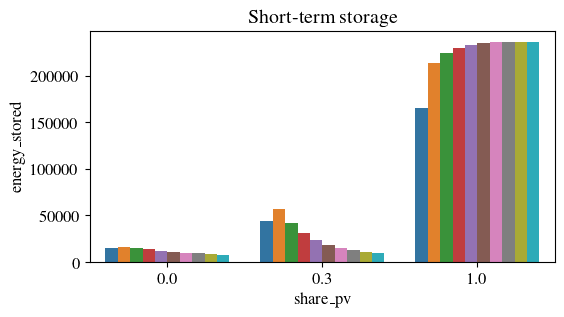

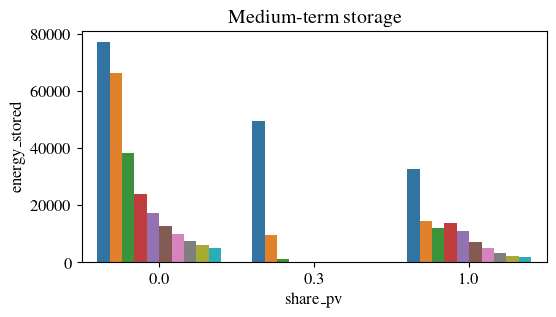

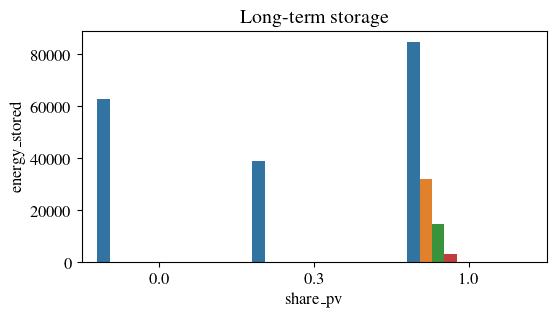

In [56]:
storage_dict = {
    0: "Short-term storage",
    1: "Medium-term storage",
    2: "Long-term storage"
}
for storage_type, title in storage_dict.items():
    plot_df = storage_equivalent.loc[storage_equivalent.storage_type==storage_type].groupby(
        ["share_pv", "share_gen_to_load"]).sum().reset_index()
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.set_title(title)
    sns.barplot(data=plot_df, x="share_pv", hue="share_gen_to_load", y="energy_stored", ax=ax)
    ax.legend().remove()

# Distribution grid constraints

In [17]:
scenarios = ["DG_reference", "DG_flexible_base", "DG_flexible_max"]
storage_equivalent = pd.DataFrame()
for scenario in scenarios:
    storage_equivalent_tmp = pd.read_csv(
            f"results/se2_distribution_grids/{scenario}/storage_equivalents.csv",
            index_col=0)
    storage_equivalent_tmp["Flexibility Scenario"] = scenario
    storage_equivalent = pd.concat([storage_equivalent, storage_equivalent_tmp])
storage_equivalent

,storage_type,energy_stored,dg_reinforcement,Flexibility Scenario
0,0,60854.479931,full,DG_reference
1,1,66598.886003,full,DG_reference
2,2,74443.302152,full,DG_reference
0,0,35838.541595,full,DG_flexible_base
1,1,63634.201570,full,DG_flexible_base
2,2,73949.759865,full,DG_flexible_base
0,0,36555.631299,full,DG_flexible_max
1,1,30777.724788,full,DG_flexible_max
2,2,65671.773834,full,DG_flexible_max


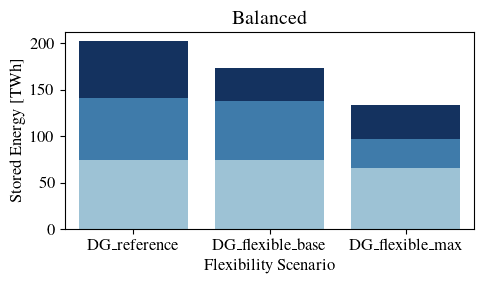

In [19]:
# without grid contraints
parameter = {"Flexibility Scenario": "Flexibility Scenario"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title="Balanced",
            loc= None
        )

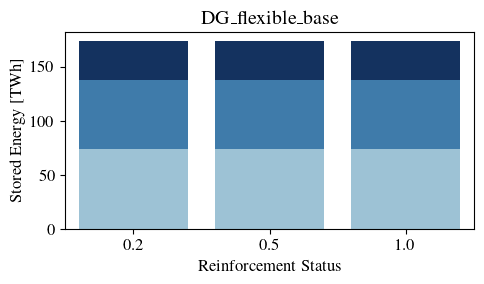

In [22]:
scenario = "DG_flexible_base"
share_gen_to_load = 1.0
storage_equivalent = pd.read_csv(
        f"results/test_to_delete/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"dg_reinforcement": "Reinforcement Status"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=scenario,
            loc=None
        )

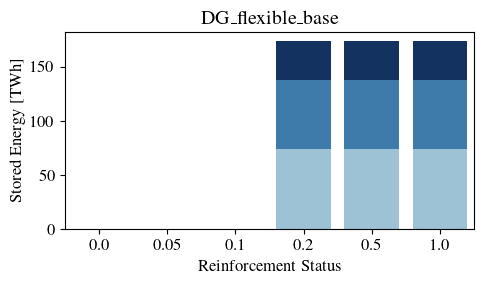

In [24]:
scenario = "DG_flexible_base"
share_gen_to_load = 1.0
storage_equivalent = pd.read_csv(
        f"results/test_to_delete/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"dg_reinforcement": "Reinforcement Status"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=scenario,
            loc=None
        )

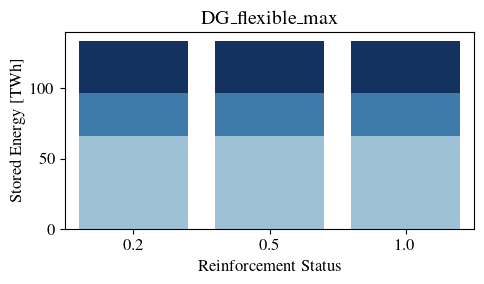

In [23]:
scenario = "DG_flexible_max"
share_gen_to_load = 1.0
storage_equivalent = pd.read_csv(
        f"results/test_to_delete/{scenario}/storage_equivalents.csv",
        index_col=0)
parameter = {"dg_reinforcement": "Reinforcement Status"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            language=language,
            title=scenario,
            loc=None
        )